# Startup Failure Research

A Comprehensive Dataset of 483 Startup Failures by sector of operations

By: Damola Adediran

<hr>

## About the Dataset

Explore the rise and fall of 483 startups with this detailed dataset, sourced from CB Insights' "Startup Failure Post-Mortem" compilation (last updated May 29, 2024). This dataset catalogs failed ventures across diverse industries, offering insights into their names, operational sectors, and years of activity—from founding to shut down. Spanning over three decades (1992–2024), it captures the volatile world of innovation, from dot-com busts to modern tech flops.

### Columns:

- Name: The startup’s name.

- Sector: Industry classification (all "Information" here, NAICS 51).

- Years of Operation: Lifespan in years, with founding and shutdown years (e.g., "3 (2010-2013)").

- What They Did: Brief overview of the startup’s product or service.

- How Much They Raised: Funding amount in millions ($M) or tied to parent totals (e.g., "$1.7B (Dropbox)").

- Why They Failed: Reasons the startup ceased or faded as a standalone entity.

- Takeaway: Key lesson derived from the failure.

- Giants: 1 if lost to tech giants (e.g., Google, Amazon), 0 if not.

- No Budget: 1 if ran out of cash or was underfunded, 0 if not.

- Competition: 1 if outpaced by direct rivals (not just giants), 0 if not.

- Poor Market Fit: 1 if the product lacked demand or user interest, 0 if not.

- Acquisition Stagnation: 1 if stagnated or faded after acquisition, 0 if not.

- Platform Dependency: 1 if overly reliant on another platform (e.g., Twitter), 0 if not.

- Monetization Failure: 1 if couldn’t turn users into revenue, 0 if not.

- Niche Limits: 1 if too niche to scale broadly, 0 if not.

- Execution Flaws: 1 if mismanagement or tech failures contributed, 0 if not.

- Trend Shifts: 1 if market or user trends shifted away, 0 if not.

- Toxicity/Trust Issues: 1 if user toxicity or trust breaches hurt, 0 if not.

- Regulatory Pressure: 1 if legal or regulatory issues forced closure, 0 if not.

- Overhype: 1 if hype exceeded deliverable results, 0 if not.

Source: Kaggle - https://www.kaggle.com/datasets/dagloxkankwanda/startup-failures?select=Startup+Failures.csv

<hr>

## Project Goals/ Objectives

### Objective:

This project aims to analyze the causes of business failures across various industries, examining the role of funding, acquisitions, competition from large companies, and other factors in startup survival. Using a structured dataset, we will conduct exploratory data analysis (EDA), hypothesis testing, and statistical modeling to uncover patterns and actionable insights.

### Key Research Questions:

1.	Failure Causes Analysis:
	•	What are the primary reasons startups fail?
	•	How significant is competition from “giants” like Google in startup failures? (e.g., 57% of failures are attributed to giants)
	•	Do failure causes differ across industries?

2.	Company Lifespan & Failure Timing:
	•	What is the average lifespan of failed startups across industries?
	•	What percentage of startups collapse after acquisition? (e.g., 29%)
	•	Are there significant trends over time in business failures?

### Methodology:

- 	Data Analytics (SQL + Python):
	•	Use SQL for querying failure cases by industry, funding level, and acquisition status.
	•	Perform data cleaning, transformation, and visualization with Pandas, Seaborn, and Matplotlib.

- 	Hypothesis Testing:
	•	Conduct t-tests, chi-square tests, and ANOVA to determine if there are statistically significant differences in startup failures based on funding, competition, and acquisition status.


- 	Statistical Modeling:
	•	Develop logistic regression models to predict failure likelihood.
	•	Apply survival analysis to model the expected lifespan of startups based on various factors.

### Expected Outcomes:

- Interactive visualizations (e.g., failure rate heatmaps, funding impact scatter plots, lifespan distribution histograms).

- Data-driven insights into startup failure patterns.

- A well-structured report summarizing findings for strategic decision-making in the startup ecosystem.

<hr>

## Data Acquisition & Exploration

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing datasets
finance = pd.read_csv('Startup Failure (Finance and Insurance).csv')

finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    47 non-null     object 
 1   Sector                  47 non-null     object 
 2   Years of Operation      47 non-null     object 
 3   What They Did           47 non-null     object 
 4   How Much They Raised    47 non-null     object 
 5   Why They Failed         47 non-null     object 
 6   Takeaway                47 non-null     object 
 7   Giants                  47 non-null     int64  
 8   No Budget               47 non-null     int64  
 9   Competition             47 non-null     int64  
 10  Poor Market Fit         47 non-null     int64  
 11  Acquisition Stagnation  47 non-null     int64  
 12  Platform Dependency     47 non-null     int64  
 13  Monetization Failure    47 non-null     int64  
 14  Niche Limits            47 non-null     int6

In [6]:
finance.head(10)

,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Avant,Finance and Insurance,2012-2023,Online personal loans,$655M,Lost to LendingClub and high defaults,Lending needs risk balance,1,1,1,0,0,0,0,0,0,0,0,0,0.0
1,Bitpass,Finance and Insurance,2002-2008,Micropayments platform,$2M,Lost to PayPal and low adoption,Micropayments need mass use,1,0,1,1,0,0,0,0,0,0,0,0,0.0
2,Cake Financial,Finance and Insurance,2006-2011,Portfolio tracking tool,$3M,Lost to Mint and sold to TradeKing,Finance tools need scale,1,0,1,0,1,0,0,0,0,0,0,0,0.0
3,Circle,Finance and Insurance,2013-2023,Crypto payments and stablecoin,$500M,Lost to Coinbase and market shifts,Crypto needs stability,1,0,1,0,0,0,0,0,0,1,0,0,0.0
4,Clarity Money,Finance and Insurance,2016-2022,Personal finance app,$11M,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,0,1,0,1,0,0,0,0,0,0,0,0.0
5,Clinkle,Finance and Insurance,2011-2016,Mobile wallet,$30M,No product vs Apple Pay/PayPal,Execution over promises,1,0,1,0,0,0,0,0,1,0,0,0,1.0
6,Coinbase NFT,Finance and Insurance,2021-2023,NFT marketplace,$0 (Coinbase-funded),Lost to OpenSea and NFT crash,NFTs need timing,1,0,1,0,0,0,0,0,0,1,0,0,0.0
7,FundersClub,Finance and Insurance,2012-2022,Crowdfunding for startups,$20M,Lost to Kickstarter and low ROI,Crowdfunding needs hits,1,0,1,0,0,0,1,0,0,0,0,0,0.0
8,Fuze Network,Finance and Insurance,2010-2016,Prepaid card payments,$5M,Lost to Green Dot and small scale,Prepaid needs reach,1,0,1,0,0,0,0,1,0,0,0,0,0.0
9,Indiegogo Life,Finance and Insurance,2014-2019,Personal crowdfunding,$10M (est.),Lost to GoFundMe and niche focus,Personal funding needs appeal,1,0,1,1,0,0,0,1,0,0,0,0,0.0


In [8]:
#importing datasets
food = pd.read_csv('Startup Failure (Food and services).csv')

food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Cafe X to Zesty
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    27 non-null     object 
 1   Sector                  27 non-null     object 
 2   Years of Operation      27 non-null     object 
 3   What They Did           27 non-null     object 
 4   How Much They Raised    27 non-null     object 
 5   Why They Failed         27 non-null     object 
 6   Takeaway                27 non-null     object 
 7   Giants                  27 non-null     int64  
 8   No Budget               27 non-null     int64  
 9   Competition             27 non-null     int64  
 10  Poor Market Fit         27 non-null     int64  
 11  Acquisition Stagnation  27 non-null     int64  
 12  High Operational Costs  27 non-null     int64  
 13  Monetization Failure    27 non-null     int64  
 14  Niche Limits            27 non-null     i

In [12]:
food.head(10)

,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,High Operational Costs,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts
Cafe X,Accommodation and Food Services,6 (2015-2021),Robotic coffee kiosks,$15M,Closed 2021; low adoption,lost to Starbucks,Humans trump robots,1,0,1,1,0,1,0,0,0,0.0
Caviar,Accommodation and Food Services,8 (2012-2020),Premium food delivery,$90M,Sold 2020; couldn’t scale,lost to DoorDash,Premium loses to scale,1,0,1,0,1,0,0,0,0,0.0
Chef’d,Accommodation and Food Services,5 (2014-2019),Meal kit delivery,$35M,Closed 2019; high costs,lost to Blue Apron,Costs cook meal kits,1,0,1,0,0,1,0,0,0,0.0
ChowNow,Accommodation and Food Services,12 (2011-2023),Restaurant ordering platform,$64M,Faded 2023; lost to DoorDash,Middlemen get squeezed,1,0,1,0,0,0,0,0,0,0,NaN
Clover,Accommodation and Food Services,8 (2012-2020),Plant-based fast food chain,$20M,Closed 2020; niche,lost to McDonald’s,Niche eats need taste,1,0,1,0,0,1,0,1,0,0.0
Curb Food,Accommodation and Food Services,4 (2019-2023),Automated ghost kitchens,$10M,Closed 2023; tech glitches,lost to DoorDash,Robots need results,1,0,1,0,0,1,0,0,1,0.0
Dinner Lab,Accommodation and Food Services,6 (2011-2017),Pop-up dining events,$10M,Closed 2017; high costs,low demand,Events need economics,0,1,0,1,0,1,0,0,0,0.0
Flowtab,Accommodation and Food Services,3 (2011-2014),Bar ordering app,$2M,Closed 2014; low adoption,lost to POS systems,Convenience needs converts,0,1,0,1,0,0,0,0,0,0.0
Foodler,Accommodation and Food Services,14 (2004-2018),Food delivery aggregator,$5M,Sold 2018; lost to Grubhub,Aggregators need scale,1,0,1,0,1,0,0,0,0,0,NaN
Grubwithus,Accommodation and Food Services,5 (2010-2015),Social dining events,$8M,Closed 2015; waned demand,high costs,Social dining needs crowd,0,1,0,1,0,1,0,0,0,0.0


The columns for food are misaligned from finance, even the columns are not named in alignment with the content.

In [14]:
#importing datasets
health = pd.read_csv('Startup Failure (Health Care).csv')

health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    60 non-null     object
 1   Sector                  60 non-null     object
 2   Years of Operation      60 non-null     object
 3   What They Did           60 non-null     object
 4   How Much They Raised    60 non-null     object
 5   Why They Failed         60 non-null     object
 6   Takeaway                60 non-null     object
 7   Giants                  60 non-null     int64 
 8   No Budget               60 non-null     int64 
 9   Competition             60 non-null     int64 
 10  Poor Market Fit         60 non-null     int64 
 11  Acquisition Stagnation  60 non-null     int64 
 12  Platform Dependency     60 non-null     int64 
 13  Monetization Failure    60 non-null     int64 
 14  Niche Limits            60 non-null     int64 
 15  Executio

In [16]:
health.head(10)

,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Aira Health,Health Care,2015-2019,Personalized asthma/allergy app,$12M,Small user base and cash shortage,Niche apps need big audiences,0,1,1,1,0,0,1,1,0,0,0,0,0
1,Amino,Health Care,2013-2021,Doctor search and cost estimation,$45M,Lost to Zocdoc/GoodRx and slow adoption,Narrow focus beats broad,1,0,1,1,0,0,1,0,0,0,0,0,0
2,Arivale,Health Care,2015-2019,Personalized health coaching,$50M,High costs and low demand,Premium needs mass market,0,1,0,1,0,0,1,0,0,0,0,0,0
3,Augmedix,Health Care,2012-2024,Remote medical scribes,$150M,Lost to software rivals and acquired,Flexibility beats rigidity,1,0,1,0,1,0,0,0,0,0,0,0,0
4,Avizia,Health Care,2014-2018,Telemedicine for hospitals,$32M,Outpaced by bigger rivals and acquired,Niche needs a moat,1,0,1,0,1,0,0,0,0,0,0,0,0
5,Babylon Health,Health Care,2013-2023,AI-powered telemedicine,$635M,Overexpansion and losses,Quality must match scale,1,1,1,0,0,0,0,0,1,0,0,0,0
6,Basis,Health Care,2014-2016,Health smartwatch,$30M,Overheating and competition,Reliability is make-or-break,1,0,1,0,0,0,0,0,1,0,0,0,0
7,Better,Health Care,2016-2023,Mental health for employees,$4.5M,Crowded market and no differentiation,Unique value is critical,1,0,1,1,0,0,0,0,0,0,0,0,0
8,BetterHelp,Health Care,2013-2017,Online therapy (early),$31M,Trust issues and competition,Trust comes first,1,0,1,1,0,0,0,0,0,0,1,0,0
9,BioBeats,Health Care,2014-2020,Stress monitoring wearable,$7M,Lost to bigger players and acquired,Standout use case needed,1,0,1,0,1,0,0,0,0,0,0,0,0


In [18]:
# First import pandas library
import pandas as pd

# Then read the CSV file
tech = pd.read_csv('Startup Failures (Information Sector).csv')

tech.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 156 entries, ('Airy Labs', 'Information') to ('Humanoid', 'Information')
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    156 non-null    object 
 1   Sector                  156 non-null    object 
 2   Years of Operation      156 non-null    object 
 3   What They Did           156 non-null    object 
 4   How Much They Raised    156 non-null    object 
 5   Why They Failed         156 non-null    object 
 6   Takeaway                156 non-null    object 
 7   Giants                  156 non-null    int64  
 8   No Budget               156 non-null    int64  
 9   Competition             156 non-null    int64  
 10  Poor Market Fit         156 non-null    int64  
 11  Acquisition Stagnation  156 non-null    int64  
 12  Platform Dependency     156 non-null    int64  
 13  Monetization Failure    156 non-null    int6

In [20]:
tech.head(10)

,,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
Airy Labs,Information,2 (2010-2012),Educational mobile games for kids,$1.5M,Shut down in 2012 after chaotic sprint; too ma...,no focus,cash ran out,Focus beats frenzy,1,1,0,0,0,0,0,0,1,0,0,0.0,0.0
Ask Jeeves,Information,11 (1996-2007),Early search engine with butler mascot,$20M,Faded by 2007; lost to Google’s algorithm and ...,sold off,Innovation isn’t enough,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN
Bebo,Information,14 (2005-2019),Social networking site popular in UK,$12.8M,Shut down in 2019; lost to Facebook,AOL mismanagement,sold cheap,Network effects can crush,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0
Burbn,Information,2 (2010-2012),Check-in app with photo-sharing,$0.5M,Closed in 2012 but pivoted to Instagram; too c...,users didn’t care,Pivots can save,0,0,0,1,0,0,0,0,0,0,0,0,0.0,NaN
Canvas,Information,6 (2011-2017),Collaborative document editing platform,$9M,Shut down in 2017; lost to Google Docs,Dropbox Paper,no differentiation,Stand out or drown,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0
Change.org,Information,15 (2007-2022),Petition platform for activism,$50M,Startup phase “shut down” 2022; monetization a...,growth slowed,Mission drift costs,0,0,0,0,0,0,1,0,0,0,0,0,0.0,NaN
Chirp,Information,5 (2011-2016),App to share data via sound,$1.8M,Closed in 2016; niche,no real problem solved,adoption lagged,Cool doesn’t equal useful,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0
Cloudera,Information,15 (2008-2023),Big data analytics platform,$300M,Wound down 2023; lost to AWS,Google BigQuery,went private,Giants eat niches,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0
Cocoon,Information,4 (2018-2022),Privacy-focused browser,$3M,Shut down 2022; lost to VPNs,Chrome,trust waned,Trust is currency,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0
Codeacademy,Information,11 (2011-2022),Online coding lessons,$42.5M,Acquired 2021,“closed” 2022; free tiers didn’t convert,lost to Coursera,Freemium’s a gamble,0,0,1,0,1,0,1,0,0,0,0,0.0,0.0


The columns for tech are misaligned from finance, even the columns are not named properly.

In [22]:
# Try reading the CSV with error handling for inconsistent delimiters
retail = pd.read_csv('Startup Failure (Retail Trade).csv', 
                     engine='python',  # Using python engine which is more flexible
                     on_bad_lines='skip',  # Skip problematic rows
                     encoding='utf-8'  # Explicitly specify encoding
                    )

retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 99dresses to Zola Books
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    88 non-null     object 
 1   Sector                  88 non-null     object 
 2   Years of Operation      88 non-null     object 
 3   What They Did           88 non-null     object 
 4   How Much They Raised    88 non-null     object 
 5   Why They Failed         88 non-null     object 
 6   Takeaway                88 non-null     object 
 7   Giants                  88 non-null     int64  
 8   No Budget               88 non-null     int64  
 9   Competition             88 non-null     int64  
 10  Poor Market Fit         88 non-null     int64  
 11  Acquisition Stagnation  88 non-null     int64  
 12  Platform Dependency     88 non-null     int64  
 13  Monetization Failure    88 non-null     int64  
 14  Niche Limits            88 non-nu

In [24]:
retail.head(10)

,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
99dresses,Retail Trade,3 (2010-2013),Fashion swapping app,$0.5M,Shut down 2013; low retention,funding fell through,Retention is king,0,1,0,1,0,0,0,1,0,0,0,0,0.0
Ahalife,Retail Trade,7 (2010-2017),Curated luxury goods marketplace,$20M,Closed 2017; high marketing costs,lost to Amazon,Niche doesn’t defend,1,0,1,0,0,0,1,1,0,0,0,0,0.0
AllRomance,Retail Trade,10 (2006-2016),E-book retailer for romance novels,$1M,Closed 2016; financial losses,lost to Kindle,Adapt or die,1,1,0,0,0,0,1,0,1,0,0,0,0.0
Augury Books,Retail Trade,5 (2012-2017),Indie e-commerce bookstore for poetry,$0.5M,Closed 2017; couldn’t scale,lost to Amazon,Niche retail bleeds,1,1,0,0,0,0,0,1,0,0,0,0,0.0
Beepi,Retail Trade,4 (2013-2017),Peer-to-peer used car marketplace,$150M,Shut down 2017; high shipping costs,cash burned out,Costs can kill,1,1,0,0,0,0,1,0,1,0,0,0,0.0
Boxed,Retail Trade,8 (2013-2021),Bulk e-commerce platform,$326M,Bankruptcy 2021; lost to Amazon,high shipping costs,Scale trumps convenience,1,0,1,0,0,0,1,0,0,0,0,0,0.0
BurstIQ,Retail Trade,7 (2015-2022),Blockchain health data marketplace,$5.8M,Faded 2022; low adoption,lost to data brokers,Tech alone doesn’t sell,0,0,1,1,0,0,0,1,0,0,0,1,0.0
Carwoo,Retail Trade,6 (2009-2015),Online car-buying platform,$15M,Closed 2015; dealers resisted,cash ran dry,Resistance stalls disruption,0,1,1,0,0,0,0,0,0,0,0,0,0.0
Catelyn,Retail Trade,3 (2015-2018),Subscription jewelry rental service,$2M,Shut down 2018; low demand,lost to Stitch Fix,Niche needs traction,0,0,1,1,0,0,0,1,0,0,0,0,0.0
Chinictown,Retail Trade,4 (2013-2017),E-commerce for Chinese gadgets,$1M,Closed 2017; lost to Amazon,shipping delays,Speed beats novelty,1,1,0,0,0,0,1,0,0,0,0,0,0.0


The columns for retail are misaligned from finance, even the columns are not named properly.

In [26]:
#importing datasets
manufacturing = pd.read_csv('Startup Failure (Manufactures).csv')

manufacturing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    30 non-null     object
 1   Sector                  30 non-null     object
 2   Years of Operation      30 non-null     object
 3   What They Did           30 non-null     object
 4   How Much They Raised    30 non-null     object
 5   Why They Failed         30 non-null     object
 6   Takeaway                30 non-null     object
 7   Giants                  30 non-null     int64 
 8   No Budget               30 non-null     int64 
 9   Competition             30 non-null     int64 
 10  Poor Market Fit         30 non-null     int64 
 11  Acquisition Stagnation  30 non-null     int64 
 12  Platform Dependency     30 non-null     int64 
 13  Monetization Failure    30 non-null     int64 
 14  Niche Limits            30 non-null     int64 
 15  Executio

In [28]:
manufacturing.head(10)

,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Airware,Manufacturing,2011-2018,Drone hardware/software for industry,$70M,Lost to DJI and high costs,Drones need simplicity,1,1,1,0,0,0,0,0,0,0,0,0,0
1,Anki,Manufacturing,2010-2019,AI-powered toy robots,$200M,High costs and competition from Lego/Sphero,Consumer hardware needs mass pricing,1,1,1,0,0,0,0,0,0,0,0,0,0
2,Aptera Motors,Manufacturing,2005-2011,Three-wheeled electric vehicles,$40M,Lost to Tesla and quirky design,EVs need mainstream appeal,1,0,1,1,0,0,0,0,0,0,0,0,0
3,Aria Insights,Manufacturing,2008-2019,Tethered industrial drones,$39M,Small market and lost to DJI/Skydio,Hardware niches need big adopters,1,0,1,1,0,0,0,1,0,0,0,0,0
4,August Home,Manufacturing,2012-2017,Smart locks and doorbells,$73M,Lost to Ring/Nest and acquired,Smart home needs ecosystem power,1,0,1,0,1,0,0,0,0,0,0,0,0
5,BeagleBone,Manufacturing,2011-2018,Open-source computers,$5M,Lost to Raspberry Pi and small niche,Open-source needs community,1,0,1,1,0,0,0,1,0,0,0,0,0
6,Better Place,Manufacturing,2007-2013,EVs with swappable batteries,$850M,Lost to Tesla and high infra costs,Infra needs buy-in,1,1,1,0,0,0,0,0,0,0,0,0,0
7,Butterfly Network,Manufacturing,2011-2020,Handheld ultrasound device,$400M,Lost to GE/Philips and slow adoption,Medical hardware needs fast inroads,1,1,1,1,0,0,0,0,0,0,0,0,0
8,Cubelets,Manufacturing,2011-2020,Modular toy robots,$10M,Lost to Lego/Sphero and niche focus,Edtech needs scale,1,0,1,1,0,0,0,1,0,0,0,0,0
9,Dyson's EV Project,Manufacturing,2017-2019,Electric vehicle,$2.7B,Lost to Tesla/Nio and high costs,EVs are a giant’s game,1,1,1,0,0,0,0,0,0,0,0,0,1


Now, to check the alignment of the dataset so it can be merged into one dataset.

<hr>

### Column Transformation

Remove the following columns from all the datasets because they add no value to the analysis (starting with the datasets that are well structured):

What They Did: Brief overview of the startup’s product or service.
How Much They Raised: Funding amount in millions ($M) or tied to parent totals (e.g., "$1.7B (Dropbox)").
Why They Failed: Reason the startup ceased or faded as a standalone entity.
Takeaway: Key lesson derived from the failure.

In [30]:
#drop the columns above
finance = finance.drop(['What They Did', 'How Much They Raised', 'Why They Failed', 'Takeaway'], axis=1)

finance.shape

(47, 16)

In [32]:
health = health.drop(['What They Did', 'How Much They Raised', 'Why They Failed', 'Takeaway'], axis=1)

health.shape

(60, 16)

In [34]:
manufacturing = manufacturing.drop(['What They Did', 'How Much They Raised', 'Why They Failed', 'Takeaway'], axis=1)

manufacturing.shape

(30, 16)

In [36]:
#start by verifying the column names
print(finance.columns.tolist())
print(health.columns.tolist())
print(manufacturing.columns.tolist())

['Name', 'Sector', 'Years of Operation', 'Giants', 'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure', 'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype']
['Name', 'Sector', 'Years of Operation', 'Giants', 'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure', 'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype']
['Name', 'Sector', 'Years of Operation', 'Giants', 'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure', 'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype']


In [38]:
#checking every column unique values for appropriation

for col in finance.columns:
    print(col, finance[col].unique())

Name ['Avant' 'Bitpass' 'Cake Financial' 'Circle' 'Clarity Money' 'Clinkle'
 'Coinbase NFT' 'FundersClub' 'Fuze Network' 'Indiegogo Life' 'Isentium'
 'LendUp' 'LendingClub' 'LendLayer' 'Loyal3' 'Money360' 'Monitor110'
 'Mozido' 'Pawngo' 'Pay By Touch' 'Plum Will' 'PoundPay' 'ReadyForZero'
 'RushCard' 'Seed' 'Sensible' 'SigFig' 'Simple' 'SmartAsset' 'SoFi Social'
 'Square Cash' 'Taulia' 'Tilt' 'Toshl' 'TrustEgg' 'Upstart' 'Vemo'
 'Venmo Groups' 'Vittana' 'Wealthfront Cash' 'Wealthsimple Trade' 'Wepay'
 'Wesabe' 'Wise' 'YayPay' 'Ycharts' 'ZestFinance']
Sector ['Finance and Insurance']
Years of Operation ['2012-2023' '2002-2008' '2006-2011' '2013-2023' '2016-2022' '2011-2016'
 '2021-2023' '2012-2022' '2010-2016' '2014-2019' '2012-2020' '2012-2021'
 '2006-2021' '2013-2017' '2008-2018' '2005-2008' '2008-2017' '2011-2017'
 '2002-2007' '2015-2020' '2009-2013' '2010-2017' '2003-2018' '2012-2017'
 '2016-2020' '2007-2018' '2009-2016' '2016-2021' '2013-2020' '2009-2022'
 '2012-2018' '2008-2020' '

In [40]:
#checking every column unique values for appropriation

for col in health.columns:
    print(col, health[col].unique())

Name ['Aira Health' 'Amino' 'Arivale' 'Augmedix' 'Avizia' 'Babylon Health'
 'Basis' 'Better' 'BetterHelp' 'BioBeats' 'Call9' 'Cardiogram' 'CareSync'
 'CareZone' 'Clarityn' 'Clinkle' 'Cue Health' 'Dopamine Labs' 'Doxy.me'
 'Driver' 'Dthera Sciences' 'Eargo' 'FitStar' 'Ginger' 'Goldfinch Bio'
 'Healx' 'Health IQ' 'HealthRiser' 'HealthSpot' 'HealthTap+' 'HealthifyMe'
 'InTouch Health' 'iRhythm' 'Jawbone' 'Kaiku Health' 'Kyruus' 'Lantern'
 'Lantern Pharma' 'Luminary Labs' 'Lumeon' 'MediChain' 'Medicasafe'
 'Mindstrong' 'Modern Health' 'Nurx' 'Olive' 'Omada Health'
 'Outset Medical' 'Pear Therapeutics' 'PillPack' 'Proteus Digital Health'
 'Quit Genius' 'Scanadu' 'Sherpaa' 'Sprig' 'StethoCloud' 'Theranos'
 'Tinnitracks' 'uBiome' 'Zeo']
Sector ['Health Care']
Years of Operation ['2015-2019' '2013-2021' '2012-2024' '2014-2018' '2013-2023' '2014-2016'
 '2016-2023' '2013-2017' '2014-2020' '2016-2021' '2011-2018' '2013-2020'
 '2016-2020' '2011-2016' '2014-2024' '2013-2018' '2018-2018' '2010-2023'

In [42]:
#checking every column unique values for appropriation

for col in manufacturing.columns:
    print(col, manufacturing[col].unique())

Name ['Airware' 'Anki' 'Aptera Motors' 'Aria Insights' 'August Home'
 'BeagleBone' 'Better Place' 'Butterfly Network' 'Cubelets'
 "Dyson's EV Project" 'Elio Motors' 'Essential Products' 'Faraday Future'
 'Fisker Automotive' 'GoPro Karma' 'Hello' 'Jawbone' 'Juicero' 'Light'
 'Lily Robotics' 'Lytro' 'MakerBot' 'Osmo Systems' 'Pearl Automation'
 'Pebble' 'Quanergy' 'Rethink Robotics' 'Skully Helmets' 'Thalmic Labs'
 'Zume']
Sector ['Manufacturing']
Years of Operation ['2011-2018' '2010-2019' '2005-2011' '2008-2019' '2012-2017' '2007-2013'
 '2011-2020' '2017-2019' '2009-2020' '2015-2020' '2014-2023' '2015-2018'
 '2006-2017' '2013-2017' '2013-2020' '2006-2018' '2009-2017' '2014-2017'
 '2012-2016' '2012-2022' '2008-2018' '2013-2016' '2012-2020' '2015-2023']
Giants [1]
No Budget [1 0]
Competition [1]
Poor Market Fit [0 1]
Acquisition Stagnation [0 1]
Platform Dependency [0 1]
Monetization Failure [0]
Niche Limits [0 1]
Execution Flaws [0 1]
Trend Shifts [0 1]
Toxicity/Trust Issues [0]
Regulat

In [44]:
#concatenate the datasets
df_subset = pd.concat([finance, health, manufacturing], axis=0)

df_subset

,Name,Sector,Years of Operation,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Avant,Finance and Insurance,2012-2023,1,1,1,0,0,0,0,0,0,0,0,0,0.0
1,Bitpass,Finance and Insurance,2002-2008,1,0,1,1,0,0,0,0,0,0,0,0,0.0
2,Cake Financial,Finance and Insurance,2006-2011,1,0,1,0,1,0,0,0,0,0,0,0,0.0
3,Circle,Finance and Insurance,2013-2023,1,0,1,0,0,0,0,0,0,1,0,0,0.0
4,Clarity Money,Finance and Insurance,2016-2022,1,0,1,0,1,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Quanergy,Manufacturing,2012-2022,1,1,1,0,0,0,0,0,0,0,0,0,0.0
26,Rethink Robotics,Manufacturing,2008-2018,1,1,1,0,0,0,0,0,0,0,0,0,0.0
27,Skully Helmets,Manufacturing,2013-2016,1,1,1,0,0,0,0,0,1,0,0,0,1.0
28,Thalmic Labs,Manufacturing,2012-2020,1,0,1,0,1,0,0,0,0,0,0,0,0.0


In [46]:
#checking every column unique values for appropriation

for col in df_subset.columns:
    print(col, df_subset[col].unique())

Name ['Avant' 'Bitpass' 'Cake Financial' 'Circle' 'Clarity Money' 'Clinkle'
 'Coinbase NFT' 'FundersClub' 'Fuze Network' 'Indiegogo Life' 'Isentium'
 'LendUp' 'LendingClub' 'LendLayer' 'Loyal3' 'Money360' 'Monitor110'
 'Mozido' 'Pawngo' 'Pay By Touch' 'Plum Will' 'PoundPay' 'ReadyForZero'
 'RushCard' 'Seed' 'Sensible' 'SigFig' 'Simple' 'SmartAsset' 'SoFi Social'
 'Square Cash' 'Taulia' 'Tilt' 'Toshl' 'TrustEgg' 'Upstart' 'Vemo'
 'Venmo Groups' 'Vittana' 'Wealthfront Cash' 'Wealthsimple Trade' 'Wepay'
 'Wesabe' 'Wise' 'YayPay' 'Ycharts' 'ZestFinance' 'Aira Health' 'Amino'
 'Arivale' 'Augmedix' 'Avizia' 'Babylon Health' 'Basis' 'Better'
 'BetterHelp' 'BioBeats' 'Call9' 'Cardiogram' 'CareSync' 'CareZone'
 'Clarityn' 'Cue Health' 'Dopamine Labs' 'Doxy.me' 'Driver'
 'Dthera Sciences' 'Eargo' 'FitStar' 'Ginger' 'Goldfinch Bio' 'Healx'
 'Health IQ' 'HealthRiser' 'HealthSpot' 'HealthTap+' 'HealthifyMe'
 'InTouch Health' 'iRhythm' 'Jawbone' 'Kaiku Health' 'Kyruus' 'Lantern'
 'Lantern Pharma' 'L

This merging exercise was successful, time to deal with the remaining datasets.

In [48]:
df_subset.head()

,Name,Sector,Years of Operation,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Avant,Finance and Insurance,2012-2023,1,1,1,0,0,0,0,0,0,0,0,0,0.0
1,Bitpass,Finance and Insurance,2002-2008,1,0,1,1,0,0,0,0,0,0,0,0,0.0
2,Cake Financial,Finance and Insurance,2006-2011,1,0,1,0,1,0,0,0,0,0,0,0,0.0
3,Circle,Finance and Insurance,2013-2023,1,0,1,0,0,0,0,0,0,1,0,0,0.0
4,Clarity Money,Finance and Insurance,2016-2022,1,0,1,0,1,0,0,0,0,0,0,0,0.0


In [50]:
#drop the name column
df_subset = df_subset.drop(['Name'], axis=1)

df_subset.head()

,Sector,Years of Operation,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Finance and Insurance,2012-2023,1,1,1,0,0,0,0,0,0,0,0,0,0.0
1,Finance and Insurance,2002-2008,1,0,1,1,0,0,0,0,0,0,0,0,0.0
2,Finance and Insurance,2006-2011,1,0,1,0,1,0,0,0,0,0,0,0,0.0
3,Finance and Insurance,2013-2023,1,0,1,0,0,0,0,0,0,1,0,0,0.0
4,Finance and Insurance,2016-2022,1,0,1,0,1,0,0,0,0,0,0,0,0.0


In [52]:
df_subset.shape

(137, 15)

### Retail Column Adjustments

In [54]:
#checking every column unique values for appropriation

for col in retail.columns:
    print(col, retail[col].unique())

Name ['Retail Trade']
Sector ['3 (2010-2013)' '7 (2010-2017)' '10 (2006-2016)' '5 (2012-2017)'
 '4 (2013-2017)' '8 (2013-2021)' '7 (2015-2022)' '6 (2009-2015)'
 '3 (2015-2018)' '8 (2012-2020)' '13 (2010-2023)' '4 (2014-2018)'
 '3 (2013-2016)' '5 (2013-2018)' '11 (2012-2023)' '7 (2012-2019)'
 '4 (2009-2013)' '6 (2014-2020)' '7 (2011-2018)' '9 (2010-2019)'
 '5 (2009-2014)' '10 (2008-2018)' '5 (2011-2016)' '11 (2011-2022)'
 '11 (2008-2019)' '4 (2011-2015)' '9 (2014-2023)' '5 (2018-2023)'
 '8 (2014-2022)' '4 (2012-2016)' '4 (2016-2020)' '5 (2010-2015)'
 '12 (2011-2023)' '12 (2010-2022)' '6 (2012-2018)' '4 (1998-2002)'
 '8 (2010-2018)' '10 (2012-2022)' '9 (2013-2022)' '9 (2012-2021)'
 '15 (2002-2017)' '11 (2006-2017)' '10 (2009-2019)' '5 (2015-2020)'
 '2 (1998-2000)' '6 (2015-2021)' '12 (2008-2020)' '11 (2009-2020)'
 '11 (2010-2021)' '6 (2013-2019)' '10 (2011-2021)' '4 (2018-2022)'
 '3 (1996-1999)' '3 (2012-2015)' '8 (2011-2019)' '6 (2011-2017)']
Years of Operation ['Fashion swapping app' '

In [56]:
#realign the columns to the appropriate names for retail datasets
retail['Sector_1'] = retail['Name']
retail['Years of Operation_1'] = retail['Sector']


#drop the other unnecessary columns
retail = retail.drop(['Name', 'Sector', 'Years of Operation', 'What They Did', 'How Much They Raised', 'Why They Failed', 'Takeaway'], axis=1)

#rename the reassigned columns
retail = retail.rename(columns={'Sector_1': 'Sector', 'Years of Operation_1': 'Years of Operation'})

retail.head()

,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,Sector,Years of Operation
99dresses,0,1,0,1,0,0,0,1,0,0,0,0,0.0,Retail Trade,3 (2010-2013)
Ahalife,1,0,1,0,0,0,1,1,0,0,0,0,0.0,Retail Trade,7 (2010-2017)
AllRomance,1,1,0,0,0,0,1,0,1,0,0,0,0.0,Retail Trade,10 (2006-2016)
Augury Books,1,1,0,0,0,0,0,1,0,0,0,0,0.0,Retail Trade,5 (2012-2017)
Beepi,1,1,0,0,0,0,1,0,1,0,0,0,0.0,Retail Trade,4 (2013-2017)


In [60]:
# Get the correct column order from a reference dataset (e.g., finance)
correct_order = df_subset.columns.tolist()

# Ensure all datasets follow this order
retail = retail.reindex(columns=correct_order)

#check if the datasets aligned
print(df_subset.columns.tolist())
print(retail.columns.tolist())

['Sector', 'Years of Operation', 'Giants', 'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure', 'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype']
['Sector', 'Years of Operation', 'Giants', 'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure', 'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype']


In [62]:
#checking every column unique values for appropriation

for col in retail.columns:
    print(col, retail[col].unique())

Sector ['Retail Trade']
Years of Operation ['3 (2010-2013)' '7 (2010-2017)' '10 (2006-2016)' '5 (2012-2017)'
 '4 (2013-2017)' '8 (2013-2021)' '7 (2015-2022)' '6 (2009-2015)'
 '3 (2015-2018)' '8 (2012-2020)' '13 (2010-2023)' '4 (2014-2018)'
 '3 (2013-2016)' '5 (2013-2018)' '11 (2012-2023)' '7 (2012-2019)'
 '4 (2009-2013)' '6 (2014-2020)' '7 (2011-2018)' '9 (2010-2019)'
 '5 (2009-2014)' '10 (2008-2018)' '5 (2011-2016)' '11 (2011-2022)'
 '11 (2008-2019)' '4 (2011-2015)' '9 (2014-2023)' '5 (2018-2023)'
 '8 (2014-2022)' '4 (2012-2016)' '4 (2016-2020)' '5 (2010-2015)'
 '12 (2011-2023)' '12 (2010-2022)' '6 (2012-2018)' '4 (1998-2002)'
 '8 (2010-2018)' '10 (2012-2022)' '9 (2013-2022)' '9 (2012-2021)'
 '15 (2002-2017)' '11 (2006-2017)' '10 (2009-2019)' '5 (2015-2020)'
 '2 (1998-2000)' '6 (2015-2021)' '12 (2008-2020)' '11 (2009-2020)'
 '11 (2010-2021)' '6 (2013-2019)' '10 (2011-2021)' '4 (2018-2022)'
 '3 (1996-1999)' '3 (2012-2015)' '8 (2011-2019)' '6 (2011-2017)']
Giants [0 1]
No Budget [1 0]
C

In [70]:
# Use regex to extract the date range inside parentheses
retail['Years of Operation'] = retail['Years of Operation'].str.extract(r'\((\d{4}-\d{4})\)')

retail.head()

,Sector,Years of Operation,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,Year
99dresses,Retail Trade,2010-2013,0,1,0,1,0,0,0,1,0,0,0,0,0.0,3 (2010-2013)
Ahalife,Retail Trade,2010-2017,1,0,1,0,0,0,1,1,0,0,0,0,0.0,7 (2010-2017)
AllRomance,Retail Trade,2006-2016,1,1,0,0,0,0,1,0,1,0,0,0,0.0,10 (2006-2016)
Augury Books,Retail Trade,2012-2017,1,1,0,0,0,0,0,1,0,0,0,0,0.0,5 (2012-2017)
Beepi,Retail Trade,2013-2017,1,1,0,0,0,0,1,0,1,0,0,0,0.0,4 (2013-2017)


In [72]:
#drop the new Year column
retail = retail.drop(['Year'], axis=1)

retail.head()

,Sector,Years of Operation,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
99dresses,Retail Trade,2010-2013,0,1,0,1,0,0,0,1,0,0,0,0,0.0
Ahalife,Retail Trade,2010-2017,1,0,1,0,0,0,1,1,0,0,0,0,0.0
AllRomance,Retail Trade,2006-2016,1,1,0,0,0,0,1,0,1,0,0,0,0.0
Augury Books,Retail Trade,2012-2017,1,1,0,0,0,0,0,1,0,0,0,0,0.0
Beepi,Retail Trade,2013-2017,1,1,0,0,0,0,1,0,1,0,0,0,0.0


In [76]:
#compare retail shape with df_subset shape
print(retail.shape)
print(df_subset.shape)

(88, 15)
(137, 15)


Retail is ready to merge now.

In [78]:
#merge retail with df_subset

df_subset_2 = pd.concat([df_subset, retail], axis=0)

df_subset_2

,Sector,Years of Operation,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Finance and Insurance,2012-2023,1,1,1,0,0,0,0,0,0,0,0,0,0.0
1,Finance and Insurance,2002-2008,1,0,1,1,0,0,0,0,0,0,0,0,0.0
2,Finance and Insurance,2006-2011,1,0,1,0,1,0,0,0,0,0,0,0,0.0
3,Finance and Insurance,2013-2023,1,0,1,0,0,0,0,0,0,1,0,0,0.0
4,Finance and Insurance,2016-2022,1,0,1,0,1,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaarly,Retail Trade,2011-2017,0,0,1,0,0,0,0,1,0,0,0,0,0.0
Zappos Labs,Retail Trade,2013-2018,1,0,0,0,0,0,0,0,0,0,0,0,0.0
Zappos Local,Retail Trade,2015-2020,1,0,0,1,0,0,0,0,0,0,0,0,0.0
Zing,Retail Trade,2013-2018,1,0,0,0,0,0,0,1,0,0,0,0,0.0


In [80]:
#verify the merging worked as expected

for col in df_subset_2.columns:
    print(col, df_subset_2[col].unique())

Sector ['Finance and Insurance' 'Health Care' 'Manufacturing' 'Retail Trade']
Years of Operation ['2012-2023' '2002-2008' '2006-2011' '2013-2023' '2016-2022' '2011-2016'
 '2021-2023' '2012-2022' '2010-2016' '2014-2019' '2012-2020' '2012-2021'
 '2006-2021' '2013-2017' '2008-2018' '2005-2008' '2008-2017' '2011-2017'
 '2002-2007' '2015-2020' '2009-2013' '2010-2017' '2003-2018' '2012-2017'
 '2016-2020' '2007-2018' '2009-2016' '2016-2021' '2013-2020' '2009-2022'
 '2012-2018' '2008-2020' '2012-2016' '2015-2021' '2008-2015' '2018-2023'
 '2017-2023' '2011-2023' '2009-2021' '2009-2020' '2015-2019' '2013-2021'
 '2012-2024' '2014-2018' '2014-2016' '2016-2023' '2014-2020' '2011-2018'
 '2014-2024' '2013-2018' '2018-2018' '2010-2023' '2013-2015' '2011-2021'
 '2014-2023' '2002-2020' '2006-2015' '2006-2017' '2010-2015' '2017-2021'
 '2005-2023' '2017-2020' '2004-2020' '2012-2019' '2012-2015' '2008-2013'
 '2010-2019' '2005-2011' '2008-2019' '2007-2013' '2011-2020' '2017-2019'
 '2015-2018' '2006-2018' '2

### Food Column Readjustments

In [82]:
#checking every column unique values for appropriation

for col in food.columns:
    print(col, food[col].unique())

Name ['Accommodation and Food Services']
Sector ['6 (2015-2021)' '8 (2012-2020)' '5 (2014-2019)' '12 (2011-2023)'
 '4 (2019-2023)' '6 (2011-2017)' '3 (2011-2014)' '14 (2004-2018)'
 '5 (2010-2015)' '8 (2010-2018)' '4 (2013-2017)' '5 (2015-2020)'
 '15 (2006-2021)' '8 (2014-2022)' '5 (2012-2017)' '7 (2012-2019)'
 '9 (2013-2022)' '5 (2017-2022)']
Years of Operation ['Robotic coffee kiosks' 'Premium food delivery' 'Meal kit delivery'
 'Restaurant ordering platform' 'Plant-based fast food chain'
 'Automated ghost kitchens' 'Pop-up dining events' 'Bar ordering app'
 'Food delivery aggregator' 'Social dining events' 'Premium meal delivery'
 'Chef-prepared meal delivery' 'Healthy meal delivery'
 'Restaurant pickup app' 'Restaurant ordering tablets'
 'Healthy school meals' 'Food pickup app' 'On-demand meal delivery'
 'Organic meal delivery' 'Coffee subscription service'
 'Restaurant management tool' 'Craft beer subscription'
 'Recipe platform spinoff' 'Craft beer delivery' 'Food-tourism platform

The columns are also not well-named as expected for the data structure.

In [4]:
#realign the columns to the appropriate names for food datasets
food['Sector_1'] = food['Name']
food['Years of Operation_1'] = food['Sector']


#drop the other unnecessary columns
food = food.drop(['Name', 'Sector', 'Years of Operation', 'What They Did', 'How Much They Raised', 'Why They Failed', 'Takeaway'], axis=1)

#rename the reassigned columns
food = food.rename(columns={'Sector_1': 'Sector', 'Years of Operation_1': 'Years of Operation'})

food.head()

,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,High Operational Costs,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Sector,Years of Operation
Cafe X,1,0,1,1,0,1,0,0,0,0.0,Accommodation and Food Services,6 (2015-2021)
Caviar,1,0,1,0,1,0,0,0,0,0.0,Accommodation and Food Services,8 (2012-2020)
Chef’d,1,0,1,0,0,1,0,0,0,0.0,Accommodation and Food Services,5 (2014-2019)
ChowNow,0,1,0,0,0,0,0,0,0,NaN,Accommodation and Food Services,12 (2011-2023)
Clover,1,0,1,0,0,1,0,1,0,0.0,Accommodation and Food Services,8 (2012-2020)


In [6]:
# Get the correct column order from a reference dataset
correct_order = df_subset_2.columns.tolist()

# Ensure all datasets follow this order
food = food.reindex(columns=correct_order)

#check if the datasets aligned
print(df_subset_2.columns.tolist())
print(food.columns.tolist())

['Sector', 'Years of Operation', 'Giants', 'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure', 'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype']
['Sector', 'Years of Operation', 'Giants', 'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure', 'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype']


In [8]:
# Use regex to extract the date range inside parentheses
food['Years of Operation'] = food['Years of Operation'].str.extract(r'\((\d{4}-\d{4})\)')

food.head()

,Sector,Years of Operation,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
Cafe X,Accommodation and Food Services,2015-2021,1,0,1,1,0,NaN,0,0,0,0.0,NaN,NaN,NaN
Caviar,Accommodation and Food Services,2012-2020,1,0,1,0,1,NaN,0,0,0,0.0,NaN,NaN,NaN
Chef’d,Accommodation and Food Services,2014-2019,1,0,1,0,0,NaN,0,0,0,0.0,NaN,NaN,NaN
ChowNow,Accommodation and Food Services,2011-2023,0,1,0,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN
Clover,Accommodation and Food Services,2012-2020,1,0,1,0,0,NaN,0,1,0,0.0,NaN,NaN,NaN


In [10]:
#verify the datasets align again
print(df_subset_2.shape)
print(food.shape)

(225, 15)
(27, 15)


In [16]:
#merge food with df_subset_2 and create a new dataset

df_subset_3 = pd.concat([df_subset_2, food], axis=0)

df_subset_3

,Sector,Years of Operation,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Finance and Insurance,2012-2023,1,1,1,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
1,Finance and Insurance,2002-2008,1,0,1,1,0,0.0,0,0,0,0.0,0.0,0.0,0.0
2,Finance and Insurance,2006-2011,1,0,1,0,1,0.0,0,0,0,0.0,0.0,0.0,0.0
3,Finance and Insurance,2013-2023,1,0,1,0,0,0.0,0,0,0,1.0,0.0,0.0,0.0
4,Finance and Insurance,2016-2022,1,0,1,0,1,0.0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Deskbeers,Accommodation and Food Services,2014-2019,1,1,0,0,0,NaN,0,1,0,0.0,NaN,NaN,NaN
HelloFresh Recipe,Accommodation and Food Services,2012-2020,0,1,0,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN
Tavour,Accommodation and Food Services,2013-2022,0,0,0,0,0,NaN,1,0,0,NaN,NaN,NaN,NaN
Tastemade Travel,Accommodation and Food Services,2017-2022,1,0,1,1,0,NaN,0,0,0,0.0,NaN,NaN,NaN


In [18]:
#verify the merging worked as expected

for col in df_subset_3.columns:
    print(col, df_subset_3[col].unique())

Sector ['Finance and Insurance' 'Health Care' 'Manufacturing' 'Retail Trade'
 'Accommodation and Food Services']
Years of Operation ['2012-2023' '2002-2008' '2006-2011' '2013-2023' '2016-2022' '2011-2016'
 '2021-2023' '2012-2022' '2010-2016' '2014-2019' '2012-2020' '2012-2021'
 '2006-2021' '2013-2017' '2008-2018' '2005-2008' '2008-2017' '2011-2017'
 '2002-2007' '2015-2020' '2009-2013' '2010-2017' '2003-2018' '2012-2017'
 '2016-2020' '2007-2018' '2009-2016' '2016-2021' '2013-2020' '2009-2022'
 '2012-2018' '2008-2020' '2012-2016' '2015-2021' '2008-2015' '2018-2023'
 '2017-2023' '2011-2023' '2009-2021' '2009-2020' '2015-2019' '2013-2021'
 '2012-2024' '2014-2018' '2014-2016' '2016-2023' '2014-2020' '2011-2018'
 '2014-2024' '2013-2018' '2018-2018' '2010-2023' '2013-2015' '2011-2021'
 '2014-2023' '2002-2020' '2006-2015' '2006-2017' '2010-2015' '2017-2021'
 '2005-2023' '2017-2020' '2004-2020' '2012-2019' '2012-2015' '2008-2013'
 '2010-2019' '2005-2011' '2008-2019' '2007-2013' '2011-2020' '201

Merging was successful here.

### Tech Column Readjustments

In [20]:
#check the contents of the datasets

for col in tech.columns:
    print(col, tech[col].unique())

Name ['2 (2010-2012)' '11 (1996-2007)' '14 (2005-2019)' '6 (2011-2017)'
 '15 (2007-2022)' '5 (2011-2016)' '15 (2008-2023)' '4 (2018-2022)'
 '11 (2011-2022)' '7 (2011-2018)' '3 (2011-2014)' '6 (2010-2016)'
 '9 (2012-2021)' '13 (2010-2023)' '14 (2004-2018)' '7 (2012-2019)'
 '6 (2015-2021)' '15 (2004-2019)' '3 (2012-2015)' '12 (2011-2023)'
 '14 (2008-2022)' '7 (2009-2016)' '7 (2014-2021)' '12 (2002-2014)'
 '11 (1994-2005)' '8 (2008-2016)' '12 (2006-2018)' '5 (2007-2012)'
 '11 (2006-2017)' '5 (2010-2015)' '5 (2016-2021)' '8 (2011-2019)'
 '12 (2010-2022)' '11 (2009-2020)' '18 (1999-2017)' '13 (2009-2022)'
 '12 (2008-2020)' '6 (2014-2020)' '14 (2009-2023)' '7 (2010-2017)'
 '4 (2014-2018)' '15 (2003-2018)' '9 (1994-2003)' '5 (2018-2023)'
 '8 (2010-2018)' '5 (2015-2020)' '8 (2012-2020)' '11 (2007-2018)'
 '6 (2013-2019)' '8 (2009-2017)' '6 (2009-2015)' '10 (2009-2019)'
 '5 (2009-2014)' '13 (2007-2020)' '10 (2007-2017)' '6 (2016-2022)'
 '4 (2012-2016)' '3 (2020-2023)' '9 (2009-2018)' '5 (2017-20

In [24]:
#realign the columns to the appropriate names for food datasets
tech['Sector_1'] = 'Information'
tech['Years of Operation_1'] = tech['Name']


#drop the other unnecessary columns
tech = tech.drop(['Name', 'Sector', 'Years of Operation', 'What They Did', 'How Much They Raised', 'Why They Failed', 'Takeaway'], axis=1)

#rename the reassigned columns
tech = tech.rename(columns={'Sector_1': 'Sector', 'Years of Operation_1': 'Years of Operation'})

tech.head()

,,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,Sector,Years of Operation
Airy Labs,Information,1,1,0,0,0,0,0,0,1,0,0,0.0,0.0,Information,2 (2010-2012)
Ask Jeeves,Information,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,Information,11 (1996-2007)
Bebo,Information,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0,Information,14 (2005-2019)
Burbn,Information,0,0,1,0,0,0,0,0,0,0,0,0.0,NaN,Information,2 (2010-2012)
Canvas,Information,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0,Information,6 (2011-2017)


In [26]:
# Get the correct column order from a reference dataset
correct_order = df_subset_3.columns.tolist()

# Ensure all datasets follow this order
tech = tech.reindex(columns=correct_order)

#check if the datasets aligned
print(df_subset_3.columns.tolist())
print(tech.columns.tolist())

['Sector', 'Years of Operation', 'Giants', 'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure', 'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype']
['Sector', 'Years of Operation', 'Giants', 'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure', 'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype']


In [29]:
# Use regex to extract the date range inside parentheses
tech['Years of Operation'] = tech['Years of Operation'].str.extract(r'\((\d{4}-\d{4})\)')

tech.head()

,,Sector,Years of Operation,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
Airy Labs,Information,Information,2010-2012,1,1,0,0,0,0,0,0,1,0,0,0.0,0.0
Ask Jeeves,Information,Information,1996-2007,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN
Bebo,Information,Information,2005-2019,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0
Burbn,Information,Information,2010-2012,0,0,1,0,0,0,0,0,0,0,0,0.0,NaN
Canvas,Information,Information,2011-2017,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0


In [31]:
#verify the datasets align again
print(df_subset_3.shape)
print(tech.shape)

(252, 15)
(156, 15)


In [33]:
#merge food with df_subset_3 and create a new dataset

df_subset_4 = pd.concat([df_subset_3, tech], axis=0)

df_subset_4

,Sector,Years of Operation,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Finance and Insurance,2012-2023,1,1,1,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
1,Finance and Insurance,2002-2008,1,0,1,1,0,0.0,0,0,0,0.0,0.0,0.0,0.0
2,Finance and Insurance,2006-2011,1,0,1,0,1,0.0,0,0,0,0.0,0.0,0.0,0.0
3,Finance and Insurance,2013-2023,1,0,1,0,0,0.0,0,0,0,1.0,0.0,0.0,0.0
4,Finance and Insurance,2016-2022,1,0,1,0,1,0.0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(GoAnimate, Information)",Information,2007-2021,1,0,1,0,0,0.0,0,0,0,0.0,0.0,NaN,NaN
"(Hitpost, Information)",Information,2009-2013,0,0,0,0,0,1.0,0,0,0,0.0,0.0,NaN,NaN
"(Homer, Information)",Information,2013-2019,1,0,1,0,0,0.0,0,0,0,0.0,0.0,NaN,NaN
"(Hot Potato, Information)",Information,2009-2011,0,1,0,1,0,0.0,0,0,0,0.0,0.0,0.0,NaN


In [35]:
#verify the merging worked as expected

for col in df_subset_4.columns:
    print(col, df_subset_4[col].unique())

Sector ['Finance and Insurance' 'Health Care' 'Manufacturing' 'Retail Trade'
 'Accommodation and Food Services' 'Information']
Years of Operation ['2012-2023' '2002-2008' '2006-2011' '2013-2023' '2016-2022' '2011-2016'
 '2021-2023' '2012-2022' '2010-2016' '2014-2019' '2012-2020' '2012-2021'
 '2006-2021' '2013-2017' '2008-2018' '2005-2008' '2008-2017' '2011-2017'
 '2002-2007' '2015-2020' '2009-2013' '2010-2017' '2003-2018' '2012-2017'
 '2016-2020' '2007-2018' '2009-2016' '2016-2021' '2013-2020' '2009-2022'
 '2012-2018' '2008-2020' '2012-2016' '2015-2021' '2008-2015' '2018-2023'
 '2017-2023' '2011-2023' '2009-2021' '2009-2020' '2015-2019' '2013-2021'
 '2012-2024' '2014-2018' '2014-2016' '2016-2023' '2014-2020' '2011-2018'
 '2014-2024' '2013-2018' '2018-2018' '2010-2023' '2013-2015' '2011-2021'
 '2014-2023' '2002-2020' '2006-2015' '2006-2017' '2010-2015' '2017-2021'
 '2005-2023' '2017-2020' '2004-2020' '2012-2019' '2012-2015' '2008-2013'
 '2010-2019' '2005-2011' '2008-2019' '2007-2013' '2

The merging was successful here as well. Now the dataset is ready for further processing in one unit.

<hr>

In [37]:
#make a copy of df_subset_4

df_all = df_subset_4.copy()
df_all

,Sector,Years of Operation,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Finance and Insurance,2012-2023,1,1,1,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
1,Finance and Insurance,2002-2008,1,0,1,1,0,0.0,0,0,0,0.0,0.0,0.0,0.0
2,Finance and Insurance,2006-2011,1,0,1,0,1,0.0,0,0,0,0.0,0.0,0.0,0.0
3,Finance and Insurance,2013-2023,1,0,1,0,0,0.0,0,0,0,1.0,0.0,0.0,0.0
4,Finance and Insurance,2016-2022,1,0,1,0,1,0.0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(GoAnimate, Information)",Information,2007-2021,1,0,1,0,0,0.0,0,0,0,0.0,0.0,NaN,NaN
"(Hitpost, Information)",Information,2009-2013,0,0,0,0,0,1.0,0,0,0,0.0,0.0,NaN,NaN
"(Homer, Information)",Information,2013-2019,1,0,1,0,0,0.0,0,0,0,0.0,0.0,NaN,NaN
"(Hot Potato, Information)",Information,2009-2011,0,1,0,1,0,0.0,0,0,0,0.0,0.0,0.0,NaN


## Data Cleaning & Transformation

In [41]:
#checking for null values
df_all.isnull().sum()

Sector                      0
Years of Operation          0
Giants                      0
No Budget                   0
Competition                 0
Poor Market Fit             0
Acquisition Stagnation      0
Platform Dependency        27
Monetization Failure        0
Niche Limits                0
Execution Flaws             0
Trend Shifts                7
Toxicity/Trust Issues      27
Regulatory Pressure        98
Overhype                  174
dtype: int64

In [43]:
# Fill numerical columns with 0
df_all['Platform Dependency'].fillna(0, inplace=True)
df_all['Toxicity/Trust Issues'].fillna(0, inplace=True)
df_all['Regulatory Pressure'].fillna(0, inplace=True)
df_all['Overhype'].fillna(0, inplace=True)
df_all['Trend Shifts'].fillna(0, inplace=True)


#checking for null values
df_all.isnull().sum()

Sector                    0
Years of Operation        0
Giants                    0
No Budget                 0
Competition               0
Poor Market Fit           0
Acquisition Stagnation    0
Platform Dependency       0
Monetization Failure      0
Niche Limits              0
Execution Flaws           0
Trend Shifts              0
Toxicity/Trust Issues     0
Regulatory Pressure       0
Overhype                  0
dtype: int64

No null values are present again.

In [45]:
# Split year range into two new columns
df_all[['Start Year', 'End Year']] = df_all['Years of Operation'].str.split('-', expand=True)

# Convert to integer for further analysis
df_all['Start Year'] = pd.to_numeric(df_all['Start Year'], errors='coerce')
df_all['End Year'] = pd.to_numeric(df_all['End Year'], errors='coerce')

# Calculate the total years in operation
df_all['Years in Business'] = df_all['End Year'] - df_all['Start Year']

#drop the Years of Operation column
df_all = df_all.drop(['Years of Operation'], axis=1)

df_all

,Sector,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,Start Year,End Year,Years in Business
0,Finance and Insurance,1,1,1,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,2012,2023,11
1,Finance and Insurance,1,0,1,1,0,0.0,0,0,0,0.0,0.0,0.0,0.0,2002,2008,6
2,Finance and Insurance,1,0,1,0,1,0.0,0,0,0,0.0,0.0,0.0,0.0,2006,2011,5
3,Finance and Insurance,1,0,1,0,0,0.0,0,0,0,1.0,0.0,0.0,0.0,2013,2023,10
4,Finance and Insurance,1,0,1,0,1,0.0,0,0,0,0.0,0.0,0.0,0.0,2016,2022,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(GoAnimate, Information)",Information,1,0,1,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,2007,2021,14
"(Hitpost, Information)",Information,0,0,0,0,0,1.0,0,0,0,0.0,0.0,0.0,0.0,2009,2013,4
"(Homer, Information)",Information,1,0,1,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,2013,2019,6
"(Hot Potato, Information)",Information,0,1,0,1,0,0.0,0,0,0,0.0,0.0,0.0,0.0,2009,2011,2


In [47]:
#check the data types
df_all.dtypes

Sector                     object
Giants                      int64
No Budget                   int64
Competition                 int64
Poor Market Fit             int64
Acquisition Stagnation      int64
Platform Dependency       float64
Monetization Failure        int64
Niche Limits                int64
Execution Flaws             int64
Trend Shifts              float64
Toxicity/Trust Issues     float64
Regulatory Pressure       float64
Overhype                  float64
Start Year                  int64
End Year                    int64
Years in Business           int64
dtype: object

In [51]:
#convert all float columns to int
df_all = df_all.astype({'Trend Shifts': 'int64', 'Platform Dependency': 'int64', 'Toxicity/Trust Issues': 'int64', 'Regulatory Pressure': 'int64', 'Overhype': 'int64'})

#check the data types
df_all.dtypes

Sector                    object
Giants                     int64
No Budget                  int64
Competition                int64
Poor Market Fit            int64
Acquisition Stagnation     int64
Platform Dependency        int64
Monetization Failure       int64
Niche Limits               int64
Execution Flaws            int64
Trend Shifts               int64
Toxicity/Trust Issues      int64
Regulatory Pressure        int64
Overhype                   int64
Start Year                 int64
End Year                   int64
Years in Business          int64
dtype: object

In [59]:
#convert the sector column to str data type
df_all['Sector'] = df_all['Sector'].astype('string')

df_all.dtypes

Sector                    string[python]
Giants                             int64
No Budget                          int64
Competition                        int64
Poor Market Fit                    int64
Acquisition Stagnation             int64
Platform Dependency                int64
Monetization Failure               int64
Niche Limits                       int64
Execution Flaws                    int64
Trend Shifts                       int64
Toxicity/Trust Issues              int64
Regulatory Pressure                int64
Overhype                           int64
Start Year                         int64
End Year                           int64
Years in Business                  int64
dtype: object

In [63]:
df_all.shape

(408, 17)

In [65]:
#export the dataset to csv
df_all.to_csv('all_startups.csv', index=False)

,Sector,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,Start Year,End Year,Years in Business
0,Finance and Insurance,1,1,1,0,0,0,0,0,0,0,0,0,0,2012,2023,11
1,Finance and Insurance,1,0,1,1,0,0,0,0,0,0,0,0,0,2002,2008,6
2,Finance and Insurance,1,0,1,0,1,0,0,0,0,0,0,0,0,2006,2011,5
3,Finance and Insurance,1,0,1,0,0,0,0,0,0,1,0,0,0,2013,2023,10
4,Finance and Insurance,1,0,1,0,1,0,0,0,0,0,0,0,0,2016,2022,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(GoAnimate, Information)",Information,1,0,1,0,0,0,0,0,0,0,0,0,0,2007,2021,14
"(Hitpost, Information)",Information,0,0,0,0,0,1,0,0,0,0,0,0,0,2009,2013,4
"(Homer, Information)",Information,1,0,1,0,0,0,0,0,0,0,0,0,0,2013,2019,6
"(Hot Potato, Information)",Information,0,1,0,1,0,0,0,0,0,0,0,0,0,2009,2011,2


## Exploratory Data Analysis (EDA)

In [2]:
#load the dataset
startups = pd.read_csv('all_startups.csv')

startups

,Sector,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,Start Year,End Year,Years in Business
0,Finance and Insurance,1,1,1,0,0,0,0,0,0,0,0,0,0,2012,2023,11
1,Finance and Insurance,1,0,1,1,0,0,0,0,0,0,0,0,0,2002,2008,6
2,Finance and Insurance,1,0,1,0,1,0,0,0,0,0,0,0,0,2006,2011,5
3,Finance and Insurance,1,0,1,0,0,0,0,0,0,1,0,0,0,2013,2023,10
4,Finance and Insurance,1,0,1,0,1,0,0,0,0,0,0,0,0,2016,2022,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Information,1,0,1,0,0,0,0,0,0,0,0,0,0,2007,2021,14
404,Information,0,0,0,0,0,1,0,0,0,0,0,0,0,2009,2013,4
405,Information,1,0,1,0,0,0,0,0,0,0,0,0,0,2013,2019,6
406,Information,0,1,0,1,0,0,0,0,0,0,0,0,0,2009,2011,2


In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sector                  408 non-null    object
 1   Giants                  408 non-null    int64 
 2   No Budget               408 non-null    int64 
 3   Competition             408 non-null    int64 
 4   Poor Market Fit         408 non-null    int64 
 5   Acquisition Stagnation  408 non-null    int64 
 6   Platform Dependency     408 non-null    int64 
 7   Monetization Failure    408 non-null    int64 
 8   Niche Limits            408 non-null    int64 
 9   Execution Flaws         408 non-null    int64 
 10  Trend Shifts            408 non-null    int64 
 11  Toxicity/Trust Issues   408 non-null    int64 
 12  Regulatory Pressure     408 non-null    int64 
 13  Overhype                408 non-null    int64 
 14  Start Year              408 non-null    int64 
 15  End Ye

In [12]:
startups.isnull().sum()

Sector                    0
Giants                    0
No Budget                 0
Competition               0
Poor Market Fit           0
Acquisition Stagnation    0
Platform Dependency       0
Monetization Failure      0
Niche Limits              0
Execution Flaws           0
Trend Shifts              0
Toxicity/Trust Issues     0
Regulatory Pressure       0
Overhype                  0
Start Year                0
End Year                  0
Years in Business         0
dtype: int64

In [6]:
#drop duplicates
startups = startups.drop_duplicates()

startups.shape

(395, 17)

### Univariate analysis 

Analysis of individual variables (one at a time) to understand their distribution and detect outliers.

In [10]:
#Summary statisitcs and includes the categorical columns
startups.describe(include='all')

,Sector,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,Start Year,End Year,Years in Business
count,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Information,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.622785,0.311392,0.488608,0.286076,0.118987,0.055696,0.113924,0.179747,0.146835,0.078481,0.045570,0.032911,0.043038,2010.756962,2018.278481,7.521519
std,NaN,0.485304,0.463650,0.500504,0.452498,0.324184,0.229625,0.318122,0.384463,0.354391,0.269268,0.208814,0.178631,0.203200,4.364912,4.026362,3.547562
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1979.000000,1984.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,2017.000000,5.000000
50%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,2019.000000,7.000000
75%,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,2021.000000,10.000000


In [14]:
#checking value counts in the categorical variables
startups['Sector'].value_counts()

Sector
Information                        149
Retail Trade                        85
Health Care                         60
Finance and Insurance               46
Manufacturing                       30
Accommodation and Food Services     25
Name: count, dtype: int64

An overwhelming majority of the dataset are tech companies.

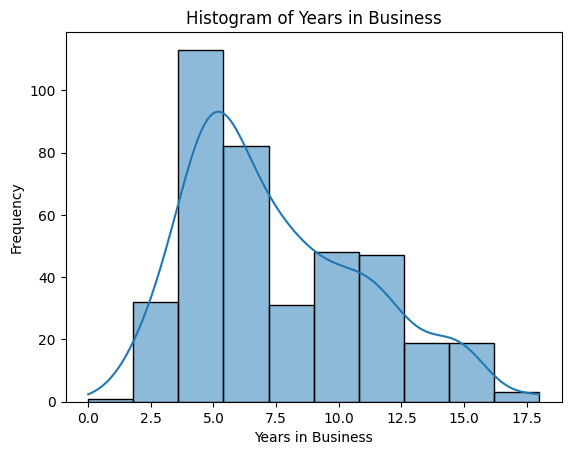

In [21]:
# Using seaborn's histplot instead of hist (which is deprecated)
sns.histplot(data=startups, x='Years in Business', bins=10, kde=True)
plt.xlabel('Years in Business')
plt.ylabel('Frequency')
plt.title('Histogram of Years in Business')
plt.show()

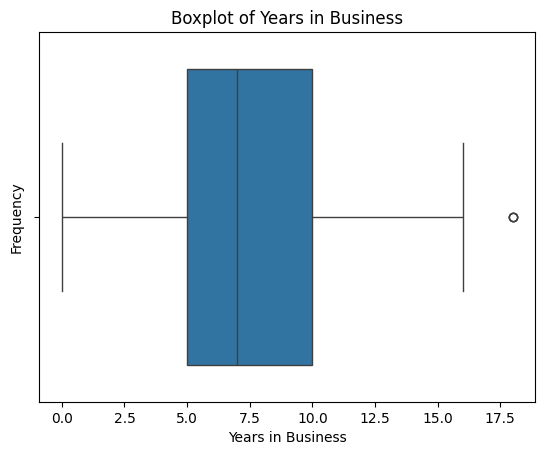

In [25]:
#boxplot of years in business
sns.boxplot(data=startups, x='Years in Business')
plt.xlabel('Years in Business')
plt.ylabel('Frequency')
plt.title('Boxplot of Years in Business')
plt.show()

There is an outlier value here

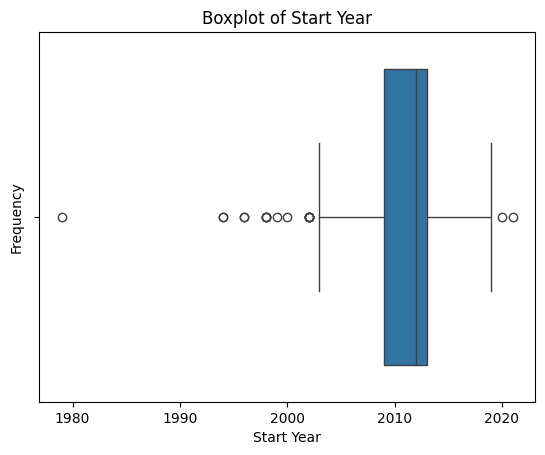

In [27]:
#boxplot of start year
sns.boxplot(data=startups, x='Start Year')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.title('Boxplot of Start Year')
plt.show()

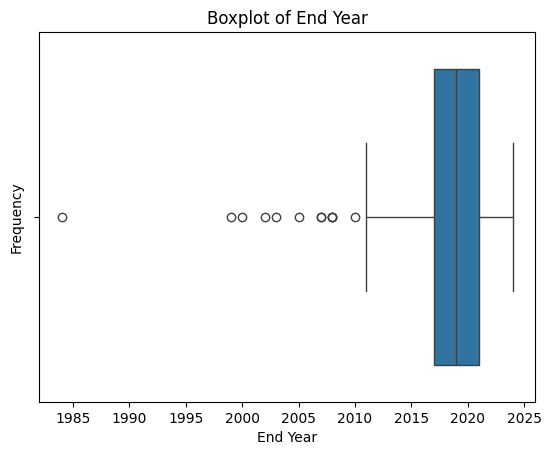

In [29]:
#boxplot of the end year
sns.boxplot(data=startups, x='End Year')
plt.xlabel('End Year')
plt.ylabel('Frequency')
plt.title('Boxplot of End Year')
plt.show()

In [31]:
#remove outlier values in Years in Business by comparing with IQR
Q1 = startups['Years in Business'].quantile(0.25)
Q3 = startups['Years in Business'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
startups = startups[(startups['Years in Business'] > lower_bound) & (startups['Years in Business'] < upper_bound)]
startups.shape

(392, 17)

We have moved from 395 to 392 data entries.

### Bivariate/multivariate relationships 

Analysis of the relationships between multiple variables.

In [35]:
#make a copy of the dataset and save
startups_2 = startups.copy()

#encode the sector column
startups['Sector'] = startups['Sector'].astype('category')
startups['Sector'] = startups['Sector'].cat.codes

#print the dataset
startups

,Sector,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,Start Year,End Year,Years in Business
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,2012,2023,11
1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,2002,2008,6
2,1,1,0,1,0,1,0,0,0,0,0,0,0,0,2006,2011,5
3,1,1,0,1,0,0,0,0,0,0,1,0,0,0,2013,2023,10
4,1,1,0,1,0,1,0,0,0,0,0,0,0,0,2016,2022,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,3,1,0,0,0,0,1,0,0,0,0,0,0,0,2013,2016,3
403,3,1,0,1,0,0,0,0,0,0,0,0,0,0,2007,2021,14
404,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2009,2013,4
405,3,1,0,1,0,0,0,0,0,0,0,0,0,0,2013,2019,6


In [47]:
#check the mapping of encoded values
# Get the category-to-code mapping
sector_mapping = dict(enumerate(startups['Sector'].cat.categories))

# Display mapping
print(sector_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


In [49]:
#checking value counts in the categorical variables
startups['Sector'].value_counts()

Sector
3    148
5     85
2     58
1     46
4     30
0     25
Name: count, dtype: int64

In [55]:
#set the sector mapping variable
sector_mapping = startups['Sector'].map({3: 'Information', 5: 'Retail Trade', 2: 'Health Care', 
1: 'Finance and Insurance', 4: 'Manufacturing', 0: 'Accommodation and Food Services'})

sector_mapping

0      Finance and Insurance
1      Finance and Insurance
2      Finance and Insurance
3      Finance and Insurance
4      Finance and Insurance
               ...          
401              Information
403              Information
404              Information
405              Information
406              Information
Name: Sector, Length: 392, dtype: category
Categories (6, object): ['Accommodation and Food Services', 'Finance and Insurance', 'Health Care', 'Information', 'Manufacturing', 'Retail Trade']

In [57]:
#develop a correlation matrix
corr_matrix = startups.corr()
corr_matrix

,Sector,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,Start Year,End Year,Years in Business
Sector,1.000000,0.005866,-0.008377,-0.152953,-0.092284,-0.092665,0.048615,0.037677,0.161811,0.082186,0.096981,0.001235,-0.040704,0.077936,-0.061084,-0.060460,0.005612
Giants,0.005866,1.000000,-0.287372,0.390014,-0.291606,0.151450,-0.040065,-0.041732,-0.037836,0.011131,-0.065900,-0.056644,-0.003678,0.087313,0.088331,0.041861,-0.061544
No Budget,-0.008377,-0.287372,1.000000,-0.283872,0.087118,-0.193737,0.051543,0.057707,-0.040076,0.061280,0.129689,-0.068496,-0.062954,0.100337,-0.023723,-0.053849,-0.033426
Competition,-0.152953,0.390014,-0.283872,1.000000,-0.145237,0.134294,-0.216744,-0.073572,-0.043780,0.022879,0.015437,0.028859,0.103527,0.041927,0.161061,0.130566,-0.048624
Poor Market Fit,-0.092284,-0.291606,0.087118,-0.145237,1.000000,-0.142876,-0.105150,0.043444,0.088465,-0.152226,-0.143485,-0.057812,-0.054062,-0.023764,0.066560,-0.089320,-0.188086
Acquisition Stagnation,-0.092665,0.151450,-0.193737,0.134294,-0.142876,1.000000,-0.020031,-0.029210,-0.128613,-0.084970,-0.048104,-0.079991,-0.023263,-0.038718,0.018601,0.050762,0.036221
Platform Dependency,0.048615,-0.040065,0.051543,-0.216744,-0.105150,-0.020031,1.000000,-0.051593,-0.084753,-0.007963,-0.071456,-0.053495,0.016738,-0.051918,-0.036393,0.044475,0.097726
Monetization Failure,0.037677,-0.041732,0.057707,-0.073572,0.043444,-0.029210,-0.051593,1.000000,-0.018086,-0.034373,0.015584,-0.078008,-0.065855,0.162349,0.025816,-0.057526,-0.099781
Niche Limits,0.161811,-0.037836,-0.040076,-0.043780,0.088465,-0.128613,-0.084753,-0.018086,1.000000,-0.156776,-0.136631,-0.070465,-0.049154,-0.099273,0.012882,-0.091891,-0.123875
Execution Flaws,0.082186,0.011131,0.061280,0.022879,-0.152226,-0.084970,-0.007963,-0.034373,-0.156776,1.000000,0.037626,0.045885,0.083319,0.193469,-0.056426,-0.034581,0.030122


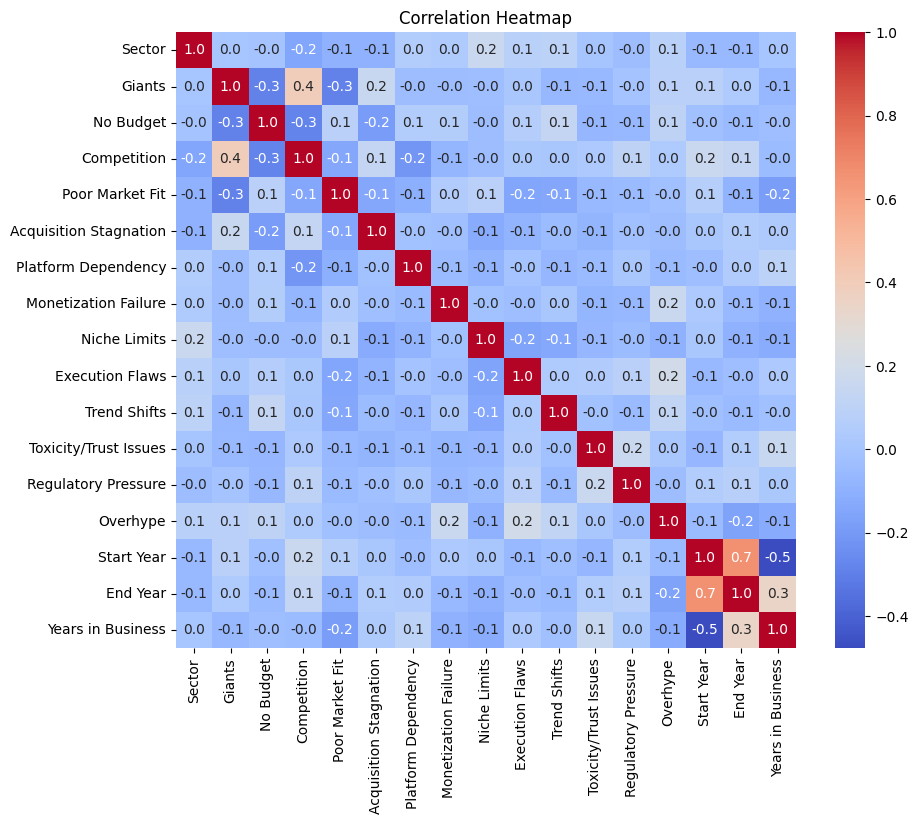

In [59]:
#correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

The high correlation between “Start Year” and “End Year” suggests redundancy - they would be removed to avoid the effects of multicollinearity in the statistical modeling phase.

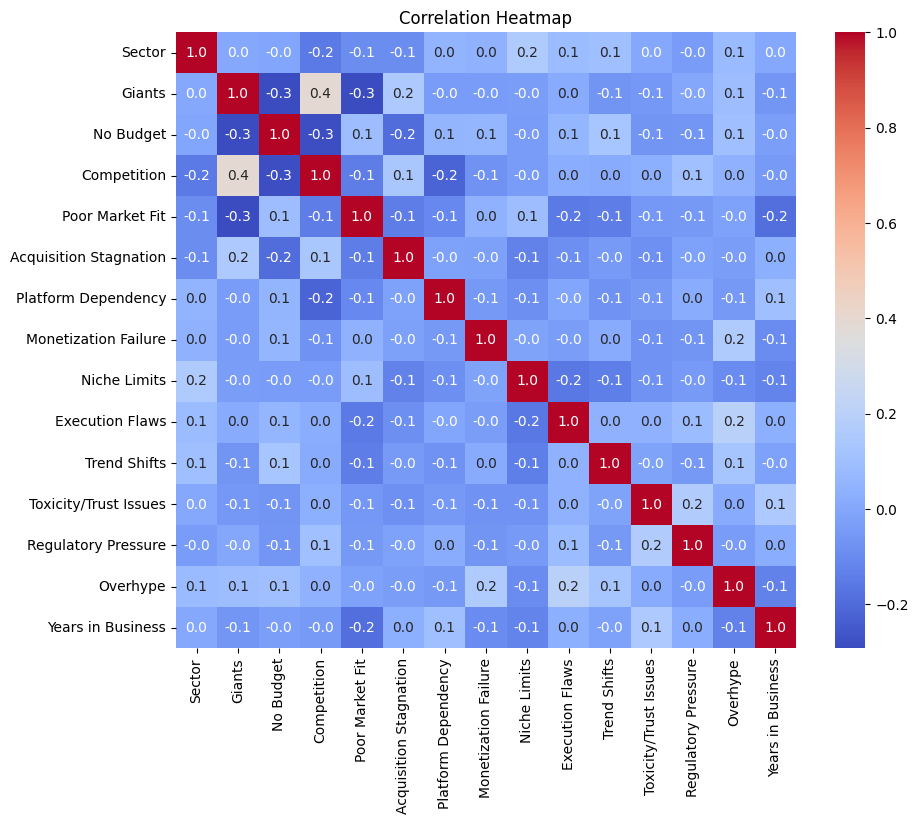

In [65]:
#drop start year and end year
startups = startups.drop(['Start Year', 'End Year'], axis=1)

#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(startups.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

Key Observations from the Heatmap

1. “Giants” vs. “Competition” (0.4)
	•	Stronger correlation suggests big tech companies played a role in startup failures due to competition.

2. “No Budget” vs. “Competition” (-0.3)
	•	A negative correlation indicates that startups that ran out of budget were not necessarily failing due to competition.

3.  “Years in Business” vs. “Competition” (-0.2)
	•	Weak negative correlation means startups that lasted longer were slightly less affected by competition.

4.  “Acquisition Stagnation” vs. “Giants” (0.2)
	•	Startups that failed after acquisition might have been affected by large companies stalling growth.

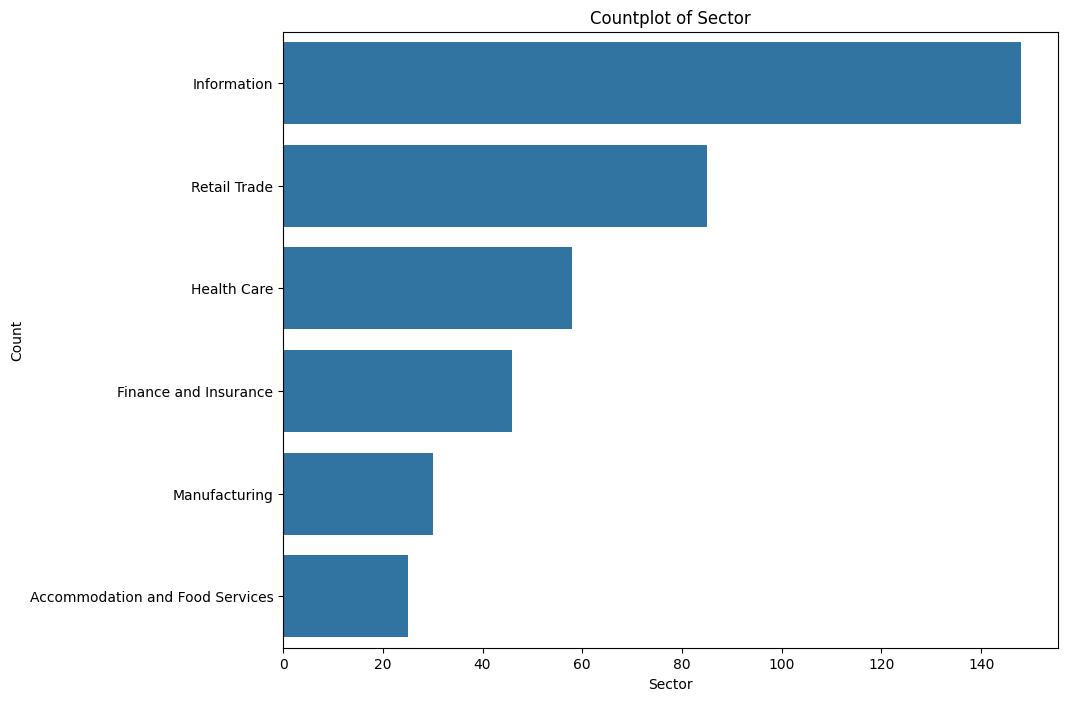

In [61]:
#visualize the sector with the most companies
plt.figure(figsize=(10, 8))
sns.countplot(y=sector_mapping, order=sector_mapping.value_counts().index)
plt.title('Countplot of Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()

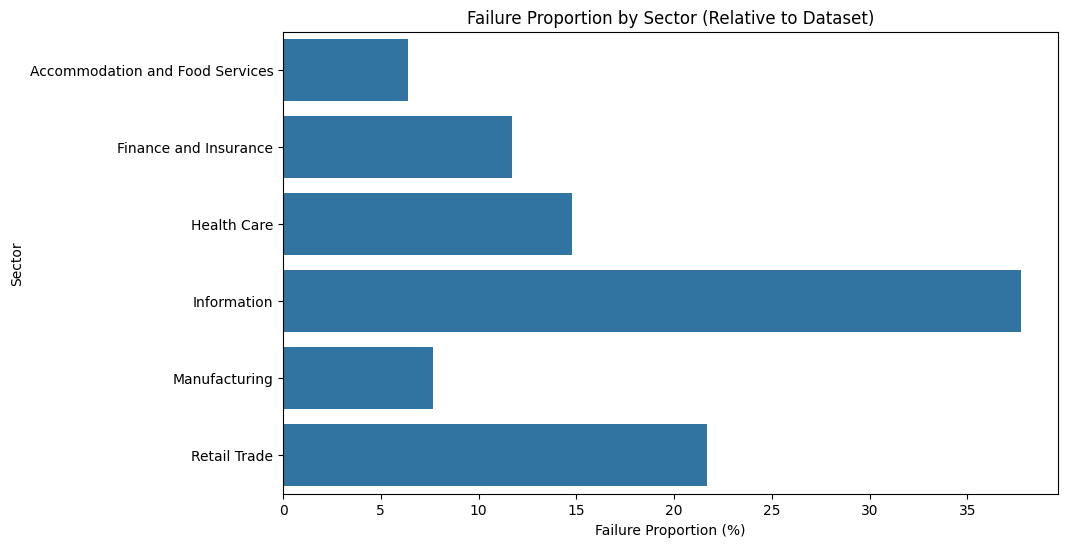

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the sector mapping is correct
sector_mapping = {
    3: "Information",
    5: "Retail Trade",
    2: "Health Care",
    1: "Finance and Insurance",
    4: "Manufacturing",
    0: "Accommodation and Food Services"
}


# Total startups in each sector (you might need to adjust based on real data)
total_startups_per_sector = {
    "Information": 148, 
    "Retail Trade": 85, 
    "Health Care": 58, 
    "Finance and Insurance": 46, 
    "Manufacturing": 30, 
    "Accommodation and Food Services": 25
}

# Calculate the proportion of failures per sector (without using total industry numbers)
failure_proportion = (failure_counts / failure_counts.sum()) * 100

# Convert to DataFrame
failure_proportion_df = failure_proportion.reset_index()
failure_proportion_df.columns = ["Sector", "Failure Proportion (%)"]

# Plot the corrected failure proportion
plt.figure(figsize=(10, 6))
sns.barplot(y=failure_proportion_df["Sector"], x=failure_proportion_df["Failure Proportion (%)"], orient="h")  
plt.title("Failure Proportion by Sector (Relative to Dataset)")
plt.xlabel("Failure Proportion (%)")
plt.ylabel("Sector")
plt.show()

Key Observation & Insights

Within this dataset, the Information (Tech) sector accounts for the highest proportion of failed startups (~35-40%), followed by Retail Trade (~20%). This pattern may reflect selection bias, as tech startups are overrepresented in the dataset. Other sectors such as Health Care, Finance, Manufacturing, and Accommodation/Food Services show lower proportions, but this does not necessarily indicate lower failure rates industry-wide—only within the available data.

The implication is that our statistical tests will only be valid within this dataset and not for all startups globally.

### Potential patterns for hypothesis testing

/tmp/ipykernel_44/574265193.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sector_failure_counts = startups.groupby("Sector")[failure_reasons].sum()


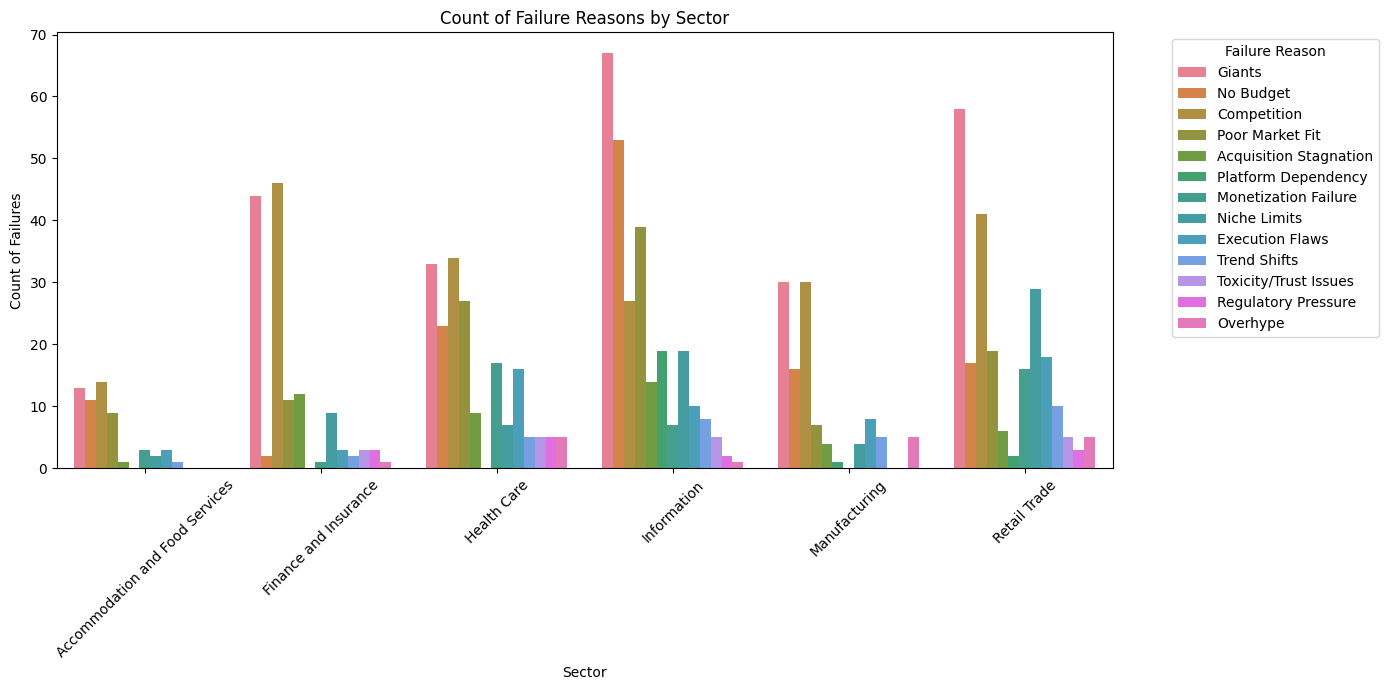

In [100]:
# Developing a multi-column bar chart to show the failure reasons by sector

# List of failure reason columns
failure_reasons = [
    "Giants", "No Budget", "Competition", "Poor Market Fit", "Acquisition Stagnation", 
    "Platform Dependency", "Monetization Failure", "Niche Limits", "Execution Flaws", 
    "Trend Shifts", "Toxicity/Trust Issues", "Regulatory Pressure", "Overhype"
]

# Ensure the sector mapping is correct
sector_mapping = {
    3: "Information",
    5: "Retail Trade",
    2: "Health Care",
    1: "Finance and Insurance",
    4: "Manufacturing",
    0: "Accommodation and Food Services"
}

# Group by sector and sum occurrences of failure reasons
sector_failure_counts = startups.groupby("Sector")[failure_reasons].sum()

# Convert to long format for visualization
sector_failure_counts_long = sector_failure_counts.reset_index().melt(
    id_vars="Sector", var_name="Failure Reason", value_name="Count"
)

# Map sector codes to sector names using sector_mapping dictionary
sector_failure_counts_long["Sector"] = sector_failure_counts_long["Sector"].map(sector_mapping)

# Plot the grouped bar chart with correct x-axis labels
plt.figure(figsize=(14, 7))
sns.barplot(data=sector_failure_counts_long, x="Sector", y="Count", hue="Failure Reason")
plt.title("Count of Failure Reasons by Sector")
plt.xlabel("Sector")
plt.ylabel("Count of Failures")
plt.xticks(rotation=45)
plt.legend(title="Failure Reason", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

Key Observed Patterns

1.  Failure Reasons Differ Across Sectors
	•	Tech (Information) startups are highly affected by Monetization Failure, Platform Dependency, and Competition.
	•	Retail startups show high failures due to Competition and Poor Market Fit, suggesting that customer adoption and business sustainability are major challenges.
	•	Finance and Insurance startups have a higher presence of Regulatory Pressure as a failure reason, likely due to strict industry regulations.
	•	Manufacturing show failure due to Execution Flaws and Competition.

2.  Competition and Giants Impact Multiple Sectors
	•	Competition is a major failure reason across multiple sectors, especially in Retail, Tech, and Health Care.
	•	Tech startups have a strong presence of failures due to Giants (big tech companies), reinforcing the idea that market dominance by large companies makes survival difficult.

3.  Some Failure Reasons Are More Niche-Specific
	•	Regulatory Pressure is prominent in Finance and Health Care, while Overhype is a noticeable factor in Information and Retail sectors.
	•	Platform Dependency is almost exclusive to Information startups, indicating reliance on external platforms (e.g., app stores, APIs) can be risky.

## Hypothesis Testing

Based on the patterns observed, here are the hypotheses being tested:

Test 1: Certain Failure Reasons Are More Common in Specific Sectors
	•	H₀ (Null Hypothesis): Failure reasons are independent of the sector (i.e., every failure reason is equally likely across all sectors).
	•	H₁ (Alternative Hypothesis): Some failure reasons are significantly more common in specific sectors.
	•	Test: Chi-Square Test for Independence (Categorical vs. Categorical).

Test 2: Startups That Fail Due to Competition Last Longer
	•	H₀: There is no significant difference in survival time (Years in Business) between startups that failed due to Competition vs. those that failed due to other reasons.
	•	H₁: Startups that failed due to Competition lasted significantly longer than those that failed due to Monetization Failure or No Budget.
	•	Test: T-test or ANOVA (Compare mean Years in Business across failure reasons).

Test 3: Regulatory Pressure and Trend Shifts Lead to Faster Failure
	•	H₀: Startups that failed due to Regulatory Pressure and Trend Shifts did not fail significantly earlier than others.
	•	H₁: Startups that failed due to Regulatory Pressure and Trend Shifts had a significantly shorter lifespan.
	•	Test: T-test / ANOVA (Compare mean Years in Business between failure reasons).

### Test 1: Certain Failure Reasons Are More Common in Specific Sectors

Hypothesis Statement

- Null Hypothesis (H₀): Failure reasons are independent of the sector (i.e., no significant relationship).

- Alternative Hypothesis (H₁): Some failure reasons are significantly more common in specific sectors (i.e., there is a relationship).

In [2]:
# List of failure reason columns
failure_reasons = [
    "Giants", "No Budget", "Competition", "Poor Market Fit", "Acquisition Stagnation", 
    "Platform Dependency", "Monetization Failure", "Niche Limits", "Execution Flaws", 
    "Trend Shifts", "Toxicity/Trust Issues", "Regulatory Pressure", "Overhype"
]

# Create a contingency table (cross-tabulation)
contingency_table = startups.groupby("Sector")[failure_reasons].sum()

/tmp/ipykernel_44/4017578538.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_table = startups.groupby("Sector")[failure_reasons].sum()


In [4]:
import scipy.stats as stats

# perform the Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value:.5f}")

Chi-Square Statistic: 202.82
Degrees of Freedom: 60
P-Value: 0.00000


Interpretation of Chi-Square Results
	•	Chi-Square Statistic: 202.82 → Indicates a strong relationship between sector and failure reasons.
	•	Degrees of Freedom: 60 → Reflects the number of independent values in the contingency table.
	•	P-Value: 0.00000 (< 0.05) → Statistically significant (the p-value is so small that it’s unlikely the observed relationship is due to chance.), meaning failure reasons are not randomly distributed across sectors.

In [6]:
# Interpretation
if p_value < 0.05:
    print("Reject H₀: Failure reasons significantly depend on the sector.")
else:
    print("Fail to reject H₀: No significant relationship between failure reasons and sector.")

Reject H₀: Failure reasons significantly depend on the sector.


We reject the null hypothesis (H₀) and conclude that failure reasons significantly depend on the sector. Certain industries are more prone to specific failure factors.

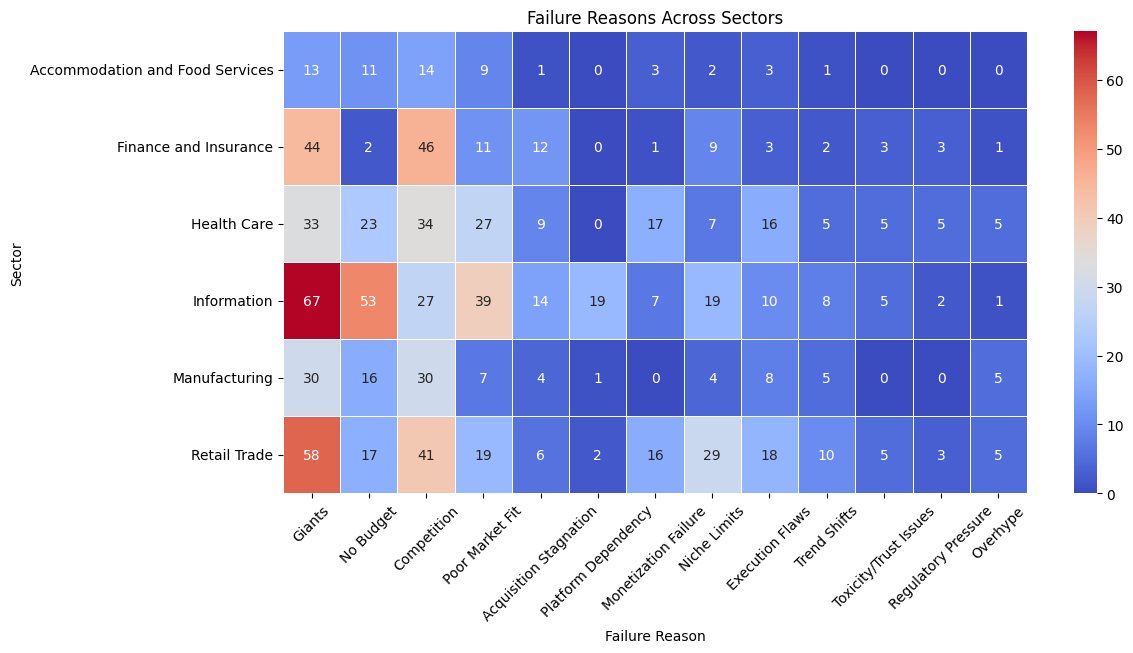

In [14]:
# Map sector numbers to names
contingency_table.index = contingency_table.index.map(sector_mapping)

# Heatmap to visualize sector-wise failure reasons
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt=".0f", linewidths=0.5)
plt.title("Failure Reasons Across Sectors")
plt.xlabel("Failure Reason")
plt.ylabel("Sector")
plt.xticks(rotation=45)
plt.show()

Key Observations from the Heatmap

	•	Every sector’s biggest failure reasons involve Giants & Competition.
	•	Tech startups (Information) are especially vulnerable to running out of funding (No Budget).
	•	Finance, Health, and Manufacturing face extreme pressure from established giants.
	•	Retail struggles with both the dominance of large players and excessive competition.
	•	Regulatory Pressure, Monetization Failure, and Poor Market Fit are secondary issues.

### Test 2: Startups That Fail Due to Competition Last Longer

•	H₀: There is no significant difference in survival time (Years in Business) between startups that failed due to Competition vs. those that failed due to other reasons.

•	H₁: Startups that failed due to Competition lasted significantly longer than those that failed due to Monetization Failure or No Budget.

This test will analyze whether startups that failed due to Competition lasted longer than those that failed due to Monetization Failure or No Budget.

In [16]:
# Extract Years in Business for each failure reason
competition_years = startups.loc[startups["Competition"] == 1, "Years in Business"]
monetization_years = startups.loc[startups["Monetization Failure"] == 1, "Years in Business"]
no_budget_years = startups.loc[startups["No Budget"] == 1, "Years in Business"]

# Check Normality (Shapiro-Wilk Test)
# We’ll check if Years in Business follows a normal distribution for each group.
print("Shapiro-Wilk Normality Test:")
print(f"Competition Failures: p-value = {stats.shapiro(competition_years)[1]:.5f}")
print(f"Monetization Failures: p-value = {stats.shapiro(monetization_years)[1]:.5f}")
print(f"No Budget Failures: p-value = {stats.shapiro(no_budget_years)[1]:.5f}")

Shapiro-Wilk Normality Test:
Competition Failures: p-value = 0.00000
Monetization Failures: p-value = 0.19089
No Budget Failures: p-value = 0.00003


Two groups (Competition, No Budget) are NOT normal, so we need to use a non-parametric alternative.

Since the Shapiro-Wilk test showed that the data is not normally distributed, we cannot use ANOVA. Instead, we proceed with the Kruskal-Wallis test, which is a non-parametric alternative to ANOVA.

In [18]:
# Perform Kruskal-Wallis Test (non-parametric alternative to ANOVA)
kruskal_stat, kruskal_p = stats.kruskal(competition_years, monetization_years, no_budget_years)

# Print results
print(f"Kruskal-Wallis Test Statistic: {kruskal_stat:.2f}")
print(f"P-Value: {kruskal_p:.5f}")

Kruskal-Wallis Test Statistic: 1.54
P-Value: 0.46405


In [20]:
# Interpretation
if kruskal_p < 0.05:
    print("\nReject H₀: There is a significant difference in survival time based on failure reason.")
else:
    print("\nFail to reject H₀: No significant difference in survival time based on failure reason.")


Fail to reject H₀: No significant difference in survival time based on failure reason.


Since the p-value is greater than 0.05, we fail to reject the null hypothesis (H₀).

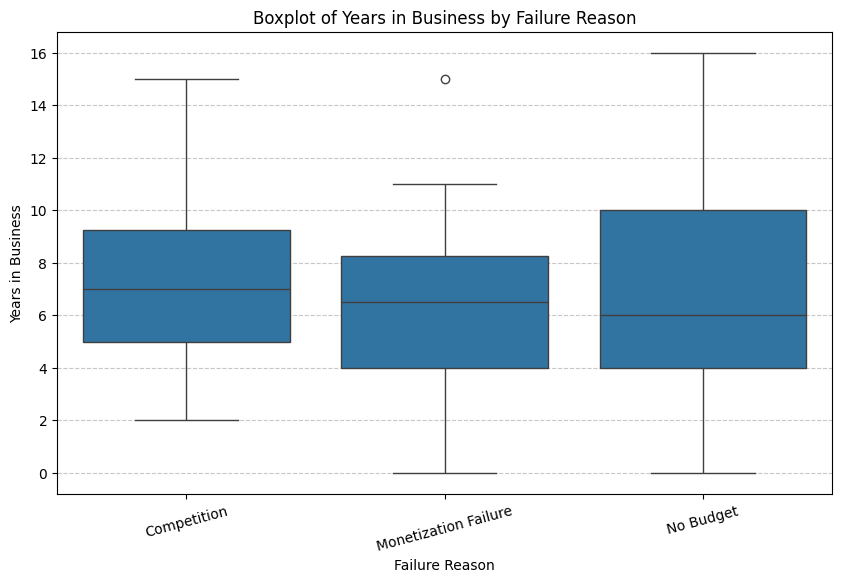

In [43]:
#boxplot for survival time by failure reason

# Prepare the data for visualization
boxplot_data = pd.DataFrame({
    "Competition": competition_years,
    "Monetization Failure": monetization_years,
    "No Budget": no_budget_years
})

# Convert to long format for Seaborn
boxplot_data_long = boxplot_data.melt(var_name="Failure Reason", value_name="Years in Business")

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_data_long, x="Failure Reason", y="Years in Business")

# Add title and labels
plt.title("Boxplot of Years in Business by Failure Reason")
plt.xlabel("Failure Reason")
plt.ylabel("Years in Business")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

Conclusion:

There is no significant difference in Years in Business between startups that failed due to Competition, Monetization Failure, or No Budget.

This suggests that:
	•	Startups that failed due to Competition did not last significantly longer than those that failed due to Monetization or Funding Issues.
	•	The reason for failure does not appear to impact how long a startup survives before failing.
	•	Other factors (e.g., industry type, funding amount, economic conditions) may influence survival time more than failure reason alone.

Key Takeaways

1. All three failure reasons (Competition, Monetization Failure, and No Budget) lead to similar startup lifespans.
2. Even though competition-driven failures occur, they don’t necessarily occur with startups that last longer.
3. Other factors beyond failure reason may play a bigger role in determining survival time.

### Test 3: Regulatory Pressure and Trend Shifts Lead to Faster Failure

Hypothesis Statements
•	H₀ (Null Hypothesis): Startups that failed due to Regulatory Pressure or Trend Shifts did not fail significantly earlier than other failures.
•	H₁ (Alternative Hypothesis): Startups that failed due to Regulatory Pressure or Trend Shifts had a significantly shorter lifespan.

In [22]:
# Extract Years in Business for each failure reason
regulatory_years = startups.loc[startups["Regulatory Pressure"] == 1, "Years in Business"]
trend_years = startups.loc[startups["Trend Shifts"] == 1, "Years in Business"]

# Create a baseline group for comparison (startups that failed due to other reasons)
other_failures = startups.loc[
    (startups["Regulatory Pressure"] == 0) & (startups["Trend Shifts"] == 0),
    "Years in Business"
]

# Perform Kruskal-Wallis Test
kruskal_stat, kruskal_p = stats.kruskal(regulatory_years, trend_years, other_failures)

# Print results
print(f"Kruskal-Wallis Test Statistic: {kruskal_stat:.2f}")
print(f"P-Value: {kruskal_p:.5f}")

Kruskal-Wallis Test Statistic: 0.08
P-Value: 0.95864


In [24]:
# Interpretation
if kruskal_p < 0.05:
    print("\nReject H₀: There is a significant difference in survival time based on failure reason.")
else:
    print("\nFail to reject H₀: No significant difference in survival time based on failure reason.")


Fail to reject H₀: No significant difference in survival time based on failure reason.


Since the p-value is greater than 0.05, we fail to reject the null hypothesis (H₀).

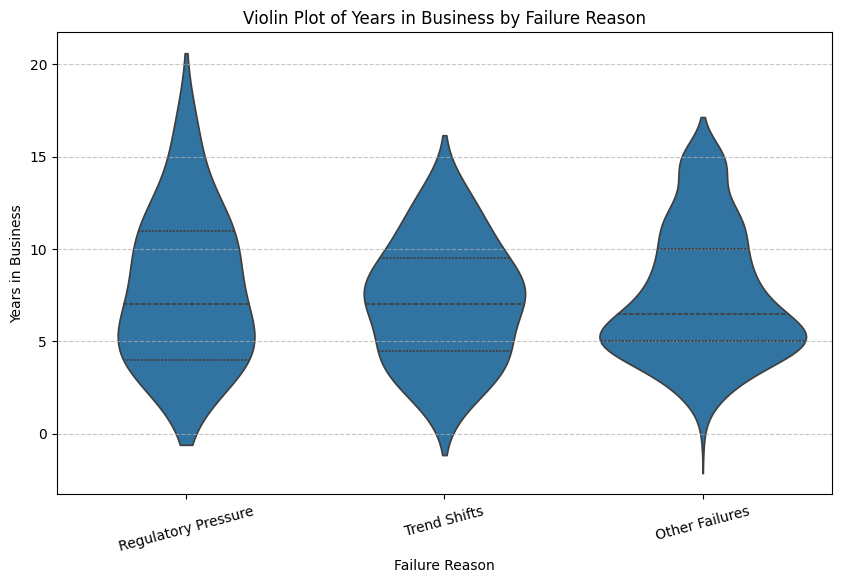

In [45]:
# Prepare the data for visualization
violin_data = pd.DataFrame({
    "Regulatory Pressure": regulatory_years,
    "Trend Shifts": trend_years,
    "Other Failures": other_failures
})

# Convert to long format for Seaborn
violin_data_long = violin_data.melt(var_name="Failure Reason", value_name="Years in Business")

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=violin_data_long, x="Failure Reason", y="Years in Business", inner="quartile")

# Add title and labels
plt.title("Violin Plot of Years in Business by Failure Reason")
plt.xlabel("Failure Reason")
plt.ylabel("Years in Business")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

Conclusion:

There is no significant difference in Years in Business between startups that failed due to Regulatory Pressure, Trend Shifts, or Other Reasons.

This suggests that:
	•	Regulatory Pressure and Trend Shifts do not significantly shorten or lengthen the survival time of startups.
	•	Other underlying factors (e.g., industry type, funding access, management decisions) may have a greater impact on survival time than regulatory or market trends.
	•	The effect of these failure reasons on survival time might not be as strong as anticipated.

Key Takeaways

1. Regulatory Pressure & Trend Shifts do not cause startups to fail significantly earlier than other reasons.
2. Startups that failed due to market changes (Trend Shifts) do not have shorter lifespans compared to those failing for other reasons.
3. The assumption that external forces (laws, regulations, market trends) significantly impact startup survival time is not supported by this dataset.

## Summary of Findings

Hypothesis 1: Failure Reasons Depend on Sector

Conclusion: Failure reasons significantly depend on the sector.

Key Insights:
	•	Tech (Information) startups fail most due to Giants (Big Tech) and No Budget.
	•	Retail startups struggle with Competition and Execution Flaws.
	•	Finance & Health startups face Regulatory Pressure and Competition.
	•	Manufacturing startups are affected by Giants and Competition.

Implication: Certain industries are more vulnerable to specific failure factors, meaning failure risk is not randomly distributed across sectors.

<hr>

Hypothesis 2: Startups That Fail Due to Competition Survive Longer

Conclusion: There is no significant difference in survival time between startups that failed due to Competition, Monetization Failure, or No Budget.

Key Insights:
	•	Startups failing due to Competition did not last significantly longer than those that failed due to Monetization or Funding Issues.
	•	All three failure reasons resulted in similar startup lifespans.

Implication: Failure reason alone does not determine how long a startup survives. Other factors (e.g., funding size, market conditions, execution strategies) may play a larger role.

<hr>

Hypothesis 3: Regulatory Pressure & Trend Shifts Reduce Survival Time

Conclusion: Regulatory Pressure and Trend Shifts do not significantly shorten or lengthen startup survival time.

Key Insights:
	•	Startups that failed due to Regulatory Pressure or Trend Shifts survived just as long as those that failed for other reasons.
	•	Market changes and legal issues may contribute to failure, but they do not accelerate it.

Implication: External factors (like regulations or market shifts) may not be the strongest predictors of startup longevity. Internal business factors may play a more decisive role.

<hr>

## Conclusion

•	Certain failure reasons are sector-specific (e.g., tech startups are vulnerable to Big Tech, and finance startups face regulatory challenges).
•	The reason for failure does not predict how long a startup survives—whether it’s competition, funding issues, or regulatory challenges.
•	External forces like regulations and market shifts do not significantly shorten survival time—execution and market fit might be more important.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9c4e779b-c812-4c56-887c-3f1dd5fc1d4b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>